# Introduction - Portfolio Optimization Model
    Investors seek out asset allocation strategies which maximize their returns and minimize their risk. One of the more popular approaches to achieving this is through quantitative computational models which utilize Modern Portfolio Theory. This theory provides a method for construction of an optimally diversified portfolio which balances risk and return through the selection of assets with differing levels of risk and potential for returns (Donald 1).

    In this paper, I introduce a computational model which aims to generate an optimal asset allocation using lessons derived from Modern Portfolio Theory and an extension thereof called the Fama-French Five Factor model. Modern Portfolio Theory accounts for factors like the risk-free rate, expected returns, and risks to return while Fama-French's model considers additional risk-related factors such as the company and its size, operating profitability, book-to-market equity value, and character of investment. By considering these factors this model is better able to accommodate sources of risks in the investment market and generate a more robust portfolio (Fama 2). 
    
    I begin the paper by reviewing the basic concepts fundamental to Modern Portfolio Theory and Fama-French’s Five Factor model and then explain how they are used in practice to construct an optimal portfolio. I will also explain the significance of models like this one. Then I will present the model in a Jupyter Notebook format where significant results and concepts are explained and expanded upon. Finally, I will discuss the importance of developing more robust computational models and suggest areas of improvement that would benefit models like this and others.


# Project Goals:
    The aim of this project is to build out an computational model which will use a variety of statistical techniques in order to suggest an optimal asset allocation for an investment portfolio. Their will also be some portfolio visualizations. Additionally, I will explore dynamic portfolio allocation methods and their feasbility as well as their effectiveness.


# Bibliography

    1. CFA, John L. M., Donald L. CFA, Dennis W. CFA, Jerald E. CFA. Managing Investment Portfolios: A Dynamic Process,  3rd Edition. John Wiley & Sons P&T, 2007.  VitalBook file.
    
    2. Fama, Eugene F. and French, Kenneth R., A Five-Factor Asset Pricing Model (September 2014). Fama-Miller Working Paper, Available at SSRN: https://ssrn.com/abstract=2287202 or http://dx.doi.org/10.2139/ssrn.2287202
    
    3. Fama, Eugene F. and French, Kenneth R., The Capital Asset Pricing Model: Theory and Evidence (August 2003). Available at SSRN: https://ssrn.com/abstract=440920 or http://dx.doi.org/10.2139/ssrn.440920
    
    4. Du, Z., & Pei, P. (2020). Backtesting portfolio value‐at‐risk with estimated portfolio weights. Journal of Time Series Analysis, 41(5), 605–619. https://doi.org/10.1111/jtsa.12524
    
    5. Wu, L., Ahmad, M., Qureshi, S. A., Raza, K., & Khan, Y. A. (2022). An analysis of machine learning risk factors and risk parity portfolio optimization. PLoS ONE, 17(9), 1–19. https://doi.org/10.1371/journal.pone.0272521
    
    6. Ivanyuk, V. (2022). Proposed Model of a Dynamic Investment Portfolio with an Adaptive Strategy. Mathematics (2227-7390), 10(23), 4394. https://doi.org/10.3390/math10234394
    
    7. Lim, Q. Y. E., Cao, Q., & Quek, C. (2022). Dynamic portfolio rebalancing through reinforcement learning. Neural Computing & Applications, 34(9), 7125–7139. https://doi.org/10.1007/s00521-021-06853-3

    8. James, N., Menzies, M., & Gottwald, G. A. (2022). On financial market correlation structures and diversification benefits across and within equity sectors. Physica A, 604, N.PAG. https://doi-org.ezproxy.lib.ndsu.nodak.edu/10.1016/j.physa.2022.127682
    
    9. Kim, R. (2018). Efficient Frontier Portfolio Optimization in Python. Towards Data Science. https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f
    
    10. Thomas, B. (2019). Portfolio Optimization using Conditional Value at Risk. https://bjerring.github.io/equity/2019/11/04/Portfolio-Optimization-using-CVaR.html

# Import Applicable Libraries

In [2]:
import pandas as pd, numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, yfinance as yf
import datetime as dt, csv, stats
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np

from tqdm import tqdm

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

In [3]:
# Override error with legacy pandas_datareader
# See https://pypi.org/project/yfinance/
yf.pdr_override()

# Selection and Download of Portfolio Stock Tickers

##### How to select stocks and how many to select?
Research shows us that we should select 30-40, but more specifically 36, different stocks uniformly across 9 sectors in order to achieve 'optimal diversification' that provides us with the 'best value'. Furthermore, the same research points out that it is more beneficial to diversify across sectors rather than within. (James, et al. 8). There are actually 11 Global Industry Classification Standard market sectors and with that said, we will ultimately want to select (36/9) * 11 = 44. With these lessons in mind we will need to figure out a way to incorporate sectors into our formulation of an optimally selected portfolio of at least 44 different stocks.

##### Two approaches to asset allocation: strategic and tactical
Strategic and tactical asset allocation are the two approaches to select and manage a portfolio.

Strategic asset allocation refers to the practice of setting a target allocation between asset classes and sectors then periodically rebalancing the portfolio throughout the year to better align with those target allocation percentages. This is done in order to maintain a consistent asset allocation through changing market environments. 

Tactical asset allocation refers to the practice of making short term focused adjustments in the portfolio's asset allocation due to changing market environments. This method introduces a degree of active management risk, but potentially can prove worthwhile in the case that active management indeed outperforms passive management. More succinctly, "The objective of tactical asset allocation is to switch an investment to the asset class that will yield the best performance during the upcoming period. The success of tactical assset allocation depends on the accuracy of the prediction of which asset class will yield the best performance" (Casas 9).

##### Improvement Possibilities
Implement a stock selection feature which walks the user through tactical or strategic asset allocation then accounts for constraints such as time horizon, risk tolerance, and liquidity requirements in order to suggest a random list of 18 stock tickers (2 for each sector) with a description of the company and features of its asset class. Then the feature will let the user choose which ones they want to include in the portfolio and incorporate those decisions into the final selection of 36 stocks.



In [4]:
# Specify the dates we desire to analyze, 20-years was deemed appropriate given this is what (James 8) used.
start_date = dt.datetime(2003,1,1)
end_date = dt.datetime.today()

# Initialize a dictionary and manually populate a list with tickers for the portfolio.
portfolio_dict = {}
portfolio_stocks = ["VOO", "BND", "TIP", "IEFA", "VUG", "VTV", "VOE",
                    "VOT", "ANGL", "IGSB", "TIP", "SUB", "VBK", "VNQ",
                    'AAPL','UVE','AMZN','REGN','NFLX','NEU','MNST']

for ticker in portfolio_stocks:
    portfolio_dict[ticker] = pdr.get_data_yahoo(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
portfolio_dict

{'VOO':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2010-09-09  102.500000  102.500000  101.139999  101.320000   79.681938   
 2010-09-10  101.680000  101.860001  101.300003  101.779999   80.043724   
 2010-09-13  102.959999  103.139999  102.500000  103.059998   81.050331   
 2010-09-14  102.839996  103.480003  102.379997  103.040001   81.034615   
 2010-09-15  102.620003  103.379997  102.400002  103.300003   81.239113   
 ...                ...         ...         ...         ...         ...   
 2023-05-01  381.730011  383.640015  381.519989  381.790009  381.790009   
 2023-05-02  381.059998  381.109985  374.670013  377.510010  377.510010   
 2023-05-03  377.910004  380.200012  374.600006  374.880005  374.880005   
 2023-05-04  373.839996  374.109985  370.920013  372.140015  372.140015   
 2023-05-05  375.739990  380.089996  375.429993  378.970001  378.970001   
 
              Vo

# Applicable Topics
##### Portfolio Management
    Essentially Portfolio Management is a sequence of steps which aim to construct a unique portfolio which aligns with an individual investor’s specific circumstances. Circumstances which ultimately culminate in a determination of how much investment risk is tolerable by the individual investor can bear and how that aligns with the level of return that the individual investor desires as a function of time and other related-factor constraints. (John 1).
##### How do you measure risk?  
    This is a fundamental issue in the field of investment management and multiple methods for measuring risk are commonly used. One of the most used proxy measures is beta which is typically referred to as volatility. Beta is calculated by taking the covariance of the return of an asset with the return of the benchmark, divided by the variance of the return of the benchmark over a specific period according to Investopedia.com. A beta of one would mean that the stock moves the same amount and in the same direction as the overall market while a higher value means that stock moves more than the market, it is more volatile or has more systematic risk. There are also the negative values indicating a negative correlation, the stock moves in the opposite direction as the overall market.
##### Risk Tolerance and Aversion
	An investor’s risk tolerance refers to the level of risk they are capable of accepting. It is determined by their desire to obtain returns as well as their ability to handle losses. If there is a discrepancy between the two then it could indicate the investor’s returns could fall short of their capacity for risk or that they are risking more than they can afford to. These two concepts are fundamental to Modern Portfolio Theory which is a framework for constructing and managing investment portfolios. Investors are risk averse, preferring to reduce the chance of losing money, and they seek to maximize return while minimizing risk. This idea of risk aversion implies that investors make cost benefit decisions requiring a higher return in exchange for taking on higher levels of risk. Essentially, investors will only invest in assets or asset classes which align with their tolerable level of risk or desire for return. This implies that risk and return coexist alongside one another and cannot be used, conceptually, without the other. 
##### The Focus of Modern Portfolio Theory
	Modern Portfolio Theory focuses on creating investment portfolios where the individual stocks are not highly correlated with each other. This idea is the driving force behind investment diversification. For instance, if an investor weighs their portfolio heavily toward technology related and / or energy companies and then a new product comes out which totally obliterates the technology sector as is, then the idea is that losses in the technology sector would be offset by the lack thereof, or perhaps for that matter--gains, in companies from other sectors. The goal is to ultimately generate a portfolio in which the individual stocks are uncorrelated with one another thereby, presumably, generating superior returns for a given level of risk.

##### Caveats for Modern Portfolio Theory
    This computational model is based off of long-run financial time series data. The accuracy of this data can be questionable due to the fact that correlations, return, and risk are susceptible to short-term fluctuations which can dramatically impact future investment performance. Relying on this long-term data is the best we have at this moment, but ultimately the next 5, 10, or even 30 years can be dramatically underperforming due to a multitude of other factors. The outcome of models relying on Modern Portfolio Theory can only be as good as its inputs.


In [6]:
portfolio_df = pd.concat([df['Adj Close'] for df in portfolio_dict.values()],
         keys = portfolio_dict.keys(), axis = 1)

In [7]:
portfolio_df.dropna() # Due to the age of VOO, we can only analyze from 2010 and on.

VOO        BND         TIP       IEFA         VUG  \
Date                                                                   
2012-10-24  106.290031  64.407700   95.556282  35.865040   62.417076   
2012-10-25  106.586380  64.301231   95.273308  35.865040   62.470524   
2012-10-26  106.504089  64.438126   95.744881  36.098911   62.506126   
2012-10-31  106.405266  64.544540   96.295059  36.023483   62.461601   
2012-11-01  107.656517  64.445709   96.186348  36.340324   63.254284   
...                ...        ...         ...        ...         ...   
2023-05-01  381.790009  73.139999  108.699997  68.699997  251.669998   
2023-05-02  377.510010  73.860001  109.529999  68.000000  249.500000   
2023-05-03  374.880005  74.169998  110.029999  68.190002  248.179993   
2023-05-04  372.140015  74.070000  110.000000  68.070000  246.949997   
2023-05-05  378.970001  73.800003  109.779999  69.050003  252.089996   

                   VTV         VOE         VOT       ANGL       IGSB  \
Date                                                                   
2012-10-24   44.494785   45.644936   60.734570  15.163582  43.690853   
2012-10-25   44.693356   45.724152   60.863670  15.141116  43.653698   
2012-10-26   44.578796   45.644936   60.900543  15.141116  43.670235   
2012-10-31   44.670444   45.827122   60.946640  15.056795  43.678471   
2012-11-01   45.098122   46.524242   62.172966  15.139305  43.608303   
...                ...         ...         ...        ...        ...   
2023-05-01  140.669998  134.740005  190.559998  27.459999  50.389999   
2023-05-02  138.610001  132.649994  187.679993  27.469999  50.549999   
2023-05-03  137.470001  132.029999  186.800003  27.459999  50.689999   
2023-05-04  136.259995  130.639999  186.220001  27.309999  50.730000   
2023-05-05  138.399994  133.110001  188.979996  27.430000  50.580002   

                   SUB         VBK        VNQ        AAPL        UVE  \
Date                                                                   
2012-10-24   96.286667   78.392128  42.429028   18.830336   2.623783   
2012-10-25   96.205498   78.667412  42.310619   18.607792   2.630359   
2012-10-26   96.268646   78.410477  41.942249   18.438665   2.630359   
2012-10-31   96.250580   79.052795  42.350082   18.173683   2.597480   
2012-11-01   96.205498   80.291588  42.554005   18.210926   2.617207   
...                ...         ...        ...         ...        ...   
2023-05-01  103.930000  214.309998  82.680000  169.589996  17.219999   
2023-05-02  104.070000  210.589996  81.279999  168.539993  16.139999   
2023-05-03  104.220001  211.429993  80.959999  167.449997  16.080000   
2023-05-04  104.250000  209.119995  81.629997  165.789993  15.600000   
2023-05-05  104.230003  213.360001  82.989998  173.570007  15.580000   

                  AMZN        REGN        NFLX         NEU       MNST  
Date                                                                   
2012-10-24   11.424500  162.690002    8.588571  198.485596   7.995000  
2012-10-25   11.146000  155.229996    8.787143  199.225143   7.848333  
2012-10-26   11.912000  149.250000    9.940000  227.213394   7.643333  
2012-10-31   11.644500  142.300003   11.320000  225.460022   7.441667  
2012-11-01   11.607000  146.369995   11.098571  230.545822   7.498333  
...                ...         ...         ...         ...        ...  
2023-05-01  102.050003  806.719971  324.119995  400.410004  56.840000  
2023-05-02  103.629997  798.450012  317.549988  398.230011  57.540001  
2023-05-03  103.650002  803.169983  319.299988  397.059998  58.360001  
2023-05-04  104.000000  753.880005  320.779999  395.850006  57.820000  
2023-05-05  105.660004  762.099976  322.760010  397.619995  59.709999  

[2649 rows x 20 columns]

In [8]:
# Calculate and assign the stock tickers percent change to another DataFrame.
percent_df = portfolio_df.pct_change()*100
percent_df.dropna()

VOO       BND       TIP      IEFA       VUG       VTV  \
Date                                                                     
2012-10-25  0.278811 -0.165304 -0.296134  0.000000  0.085630  0.446278   
2012-10-26 -0.077206  0.212895  0.494969  0.652088  0.056991 -0.256323   
2012-10-31 -0.092789  0.165143  0.574630 -0.208948 -0.071233  0.205587   
2012-11-01  1.175930 -0.153121 -0.112894  0.879541  1.269072  0.957405   
2012-11-02 -0.902269  0.035373 -0.057340 -0.768129 -0.943376 -0.863646   
...              ...       ...       ...       ...       ...       ...   
2023-05-01 -0.068048 -1.028420 -0.831124 -0.101788 -0.142840  0.078259   
2023-05-02 -1.121035  0.984415  0.763571 -1.018918 -0.862240 -1.464419   
2023-05-03 -0.696672  0.419710  0.456496  0.279415 -0.529061 -0.822451   
2023-05-04 -0.730898 -0.134823 -0.027264 -0.175983 -0.495606 -0.880197   
2023-05-05  1.835327 -0.364516 -0.200001  1.439699  2.081393  1.570527   

                 VOE       VOT      ANGL      IGSB       SUB       VBK  \
Date                                                                     
2012-10-25  0.173548  0.212566 -0.148156 -0.085041 -0.084299  0.351163   
2012-10-26 -0.173248  0.060583  0.000000  0.037882  0.065639 -0.326609   
2012-10-31  0.399138  0.075692 -0.556901  0.018859 -0.018767  0.819175   
2012-11-01  1.521197  2.012131  0.547992 -0.160646 -0.046838  1.567044   
2012-11-02 -0.851374 -1.216068  0.335987  0.104097  0.000000 -1.714266   
...              ...       ...       ...       ...       ...       ...   
2023-05-01 -0.185199 -0.005253 -0.651238 -0.371703 -0.256236  0.290138   
2023-05-02 -1.551144 -1.511338  0.036417  0.317523  0.134705 -1.735804   
2023-05-03 -0.467392 -0.468878 -0.036404  0.276952  0.144135  0.398878   
2023-05-04 -1.052791 -0.310493 -0.546248  0.078913  0.028784 -1.092559   
2023-05-05  1.890693  1.482115  0.439403 -0.295679 -0.019181  2.027547   

                 VNQ      AAPL        UVE      AMZN      REGN       NFLX  \
Date                                                                       
2012-10-25 -0.279074 -1.181836   0.250642 -2.437748 -4.585412   2.312051   
2012-10-26 -0.870633 -0.908902   0.000000  6.872419 -3.852345  13.119814   
2012-10-31  0.972368 -1.437101  -1.250004 -2.245634 -4.656614  13.883302   
2012-11-01  0.481516  0.204928   0.759467 -0.322036  2.860149  -1.956085   
2012-11-02  0.664717 -3.309034  -1.507503  0.120616 -1.960781  -1.016859   
...              ...       ...        ...       ...       ...        ...   
2023-05-01 -0.744301 -0.053039  11.673147 -3.224271  0.614873  -1.760979   
2023-05-02 -1.693277 -0.619142  -6.271777  1.548255 -1.025134  -2.027029   
2023-05-03 -0.393700 -0.646729  -0.371744  0.019304  0.591142   0.551094   
2023-05-04  0.827567 -0.991343  -2.985072  0.337673 -6.136930   0.463517   
2023-05-05  1.666055  4.692692  -0.128208  1.596157  1.090355   0.617249   

                  NEU      MNST  
Date                             
2012-10-25   0.372595 -1.834484  
2012-10-26  14.048553 -2.612019  
2012-10-31  -0.771685 -2.638455  
2012-11-01   2.255744  0.761468  
2012-11-02  -1.164276 -2.133806  
...               ...       ...  
2023-05-01   0.202702  1.500000  
2023-05-02  -0.544440  1.231528  
2023-05-03  -0.293803  1.425095  
2023-05-04  -0.304738 -0.925293  
2023-05-05   0.447136  3.268764  

[2648 rows x 20 columns]

Text(0.5, 1.0, 'Daily Stock Prices, Absolute Basis')

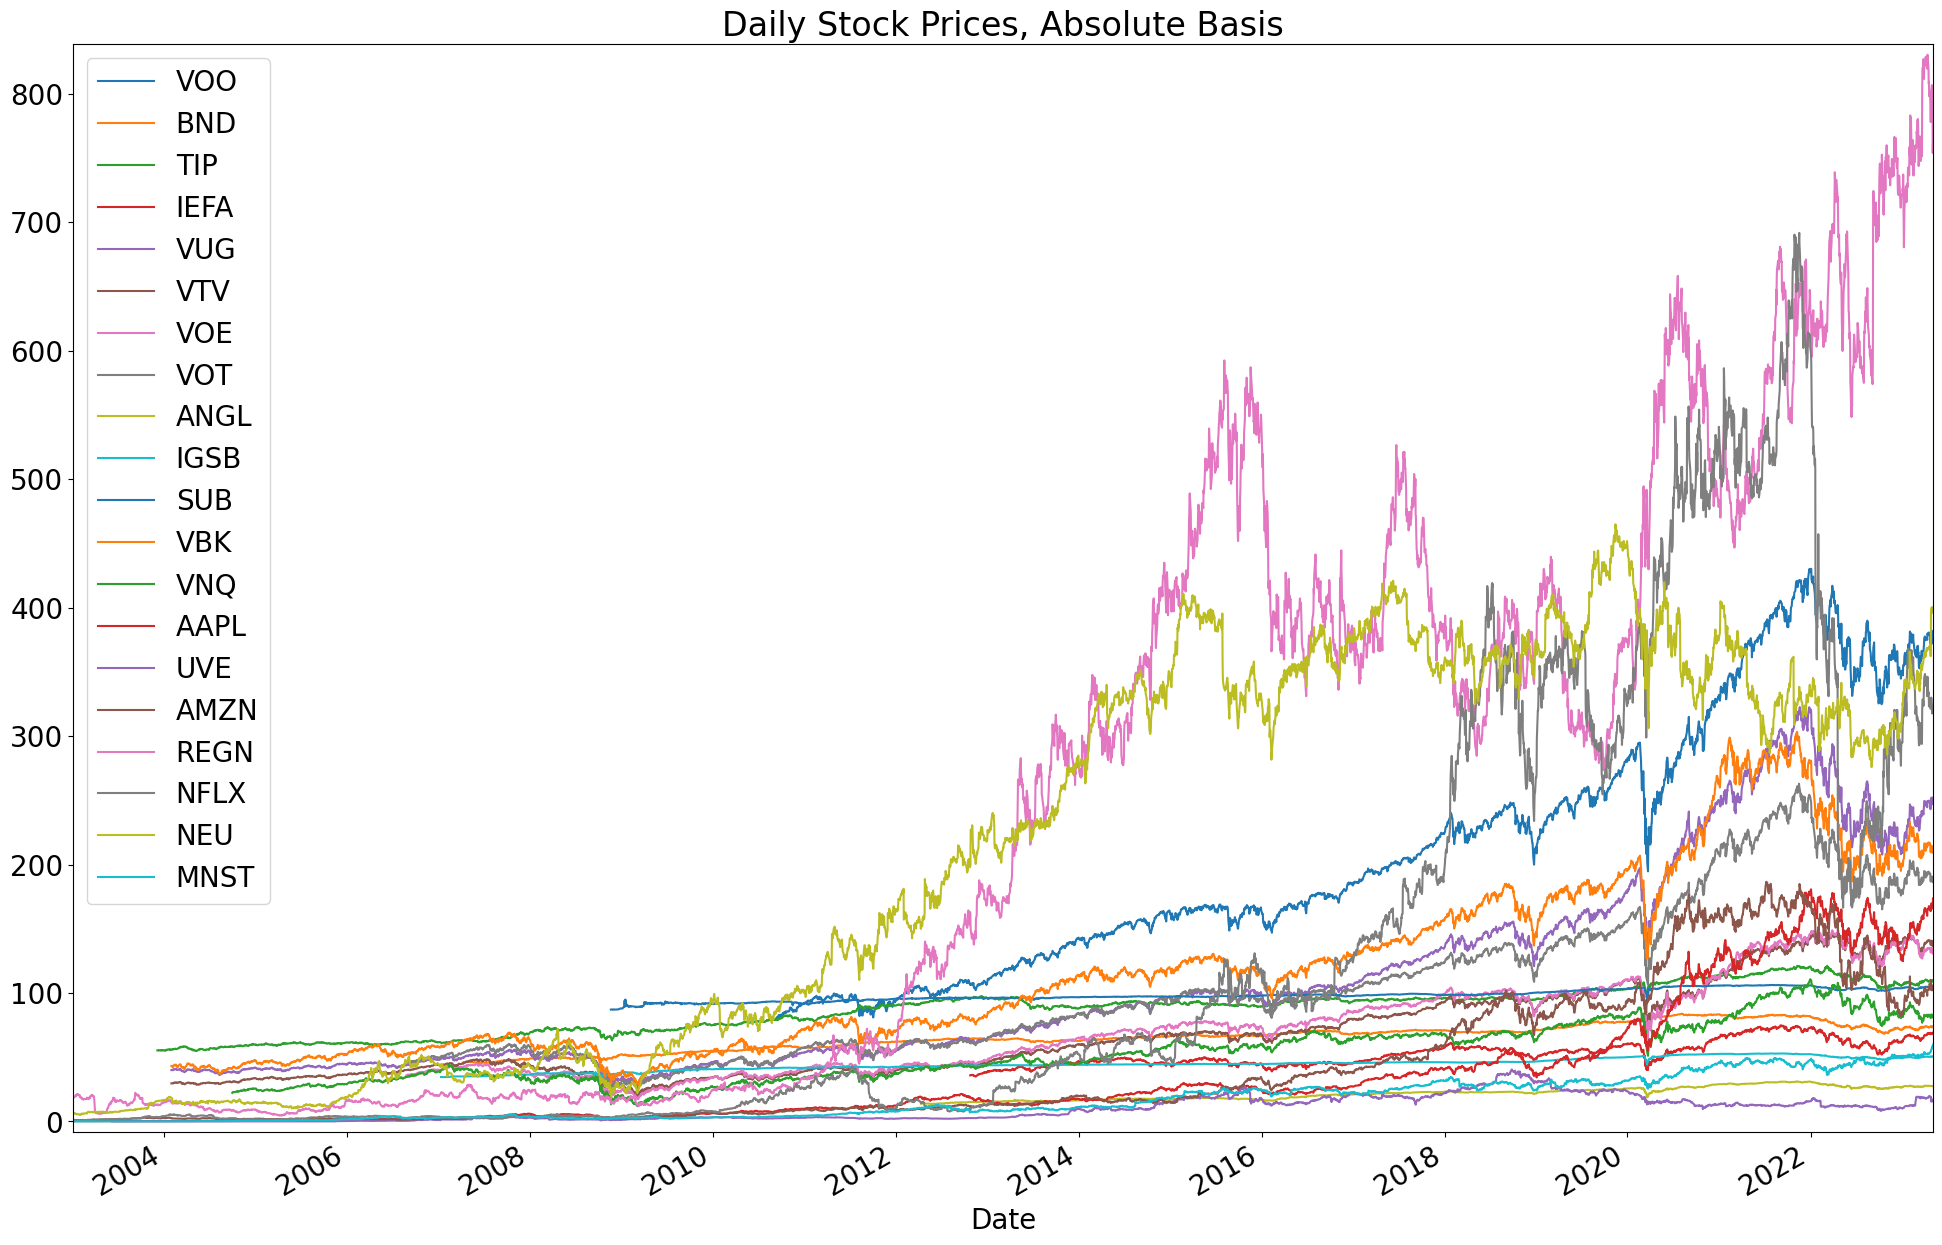

In [9]:
# Plot the Daily Adjusted Stock Prices for the Portfolio
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams.update({'font.size':20})
fig,ax=plt.subplots(figsize=(24,16))
portfolio_df.plot.line(ax=ax,legend=True)
ax.set_title("Daily Stock Prices, Absolute Basis")

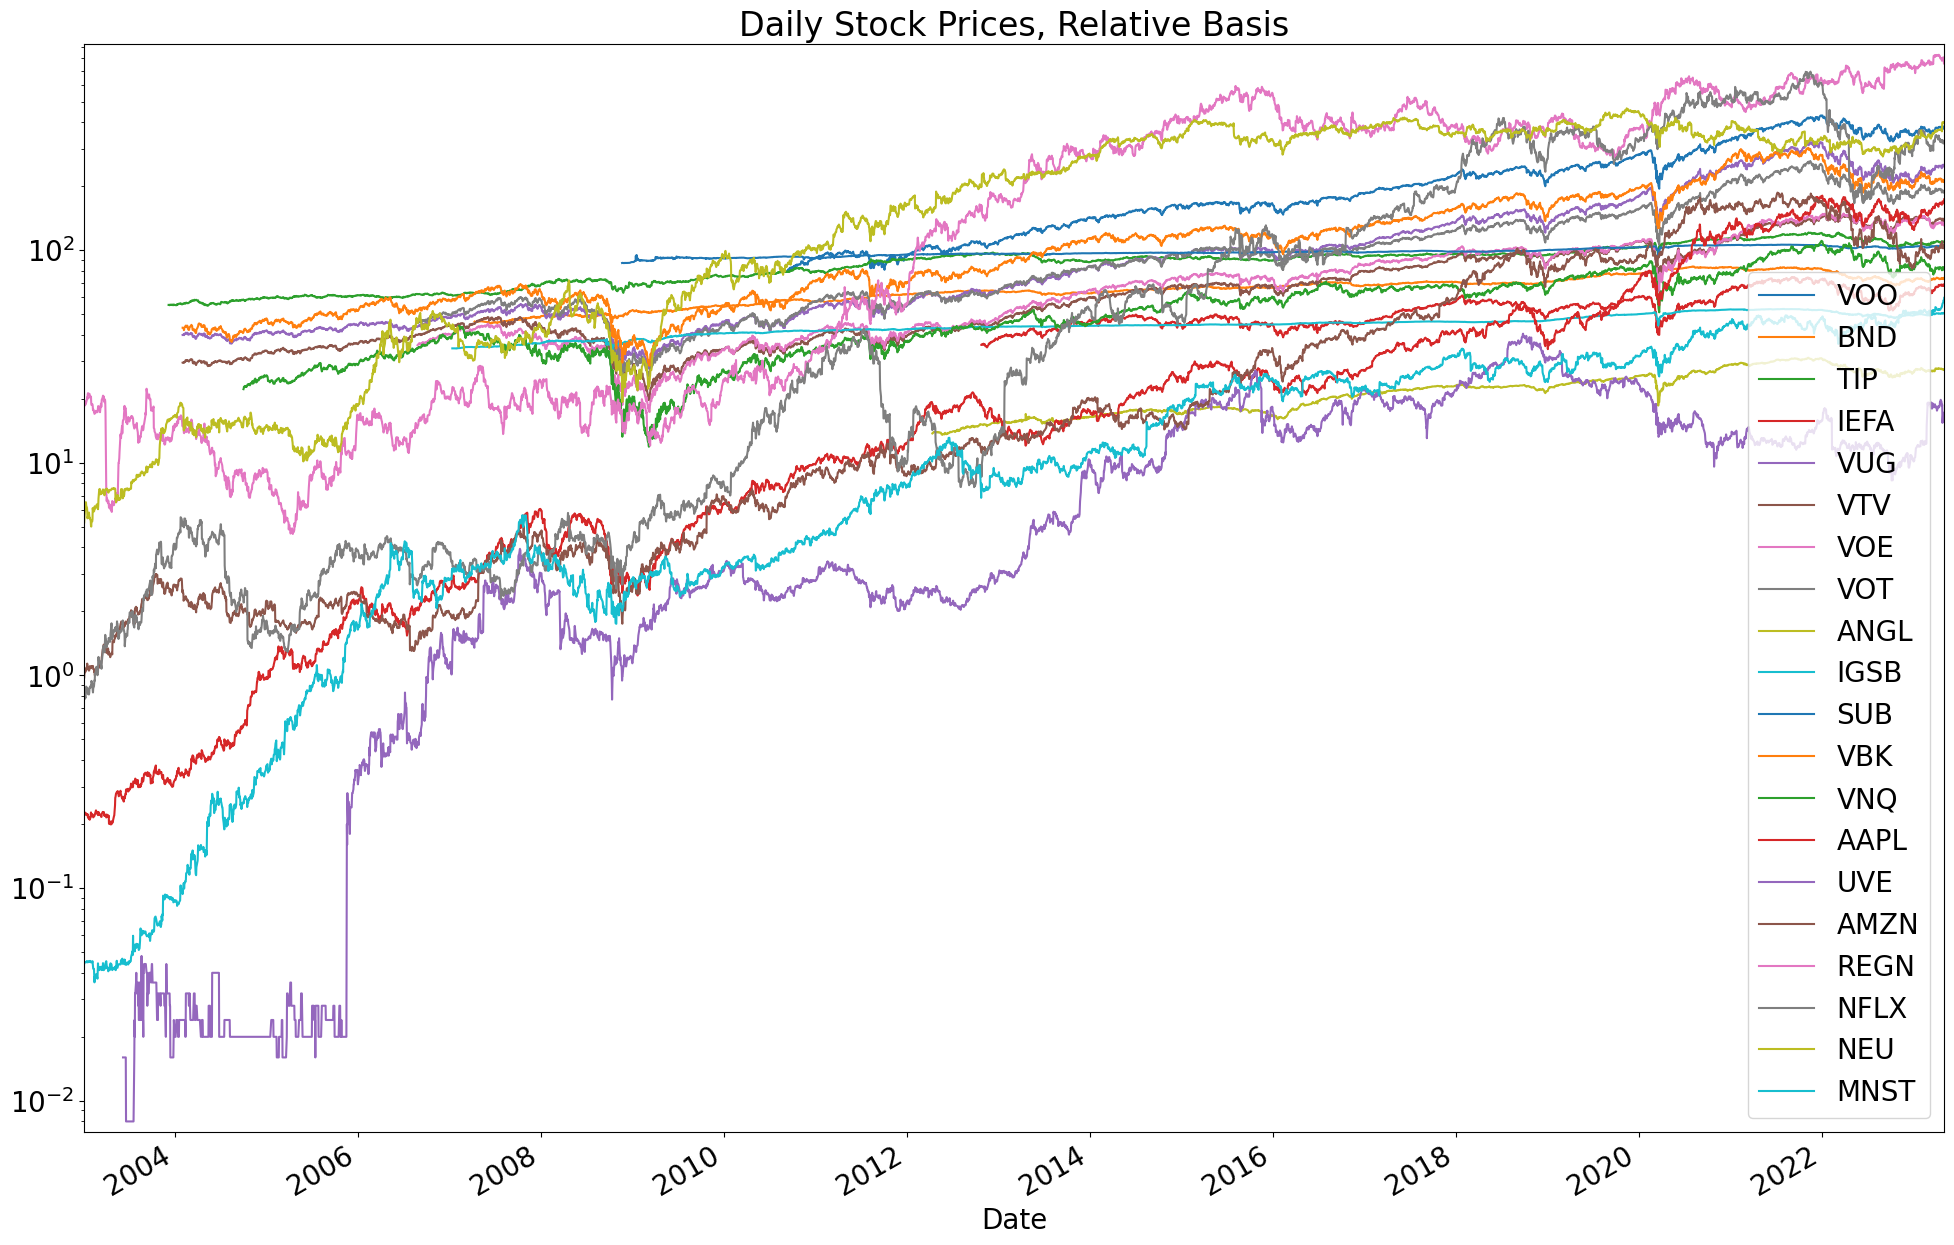

In [10]:
fig,ax=plt.subplots(figsize=(24,16))
portfolio_df.plot.line(ax=ax,legend=True)
ax.set_title("Daily Stock Prices, Relative Basis")
ax.set_yscale('log')

##### We can see that various tickers did not exist prior to 2010, 2012, and other dates. 

C:\Users\calvi\AppData\Local\Temp\ipykernel_22088\2304201794.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y, 1)) + "%" for y in y_vals])


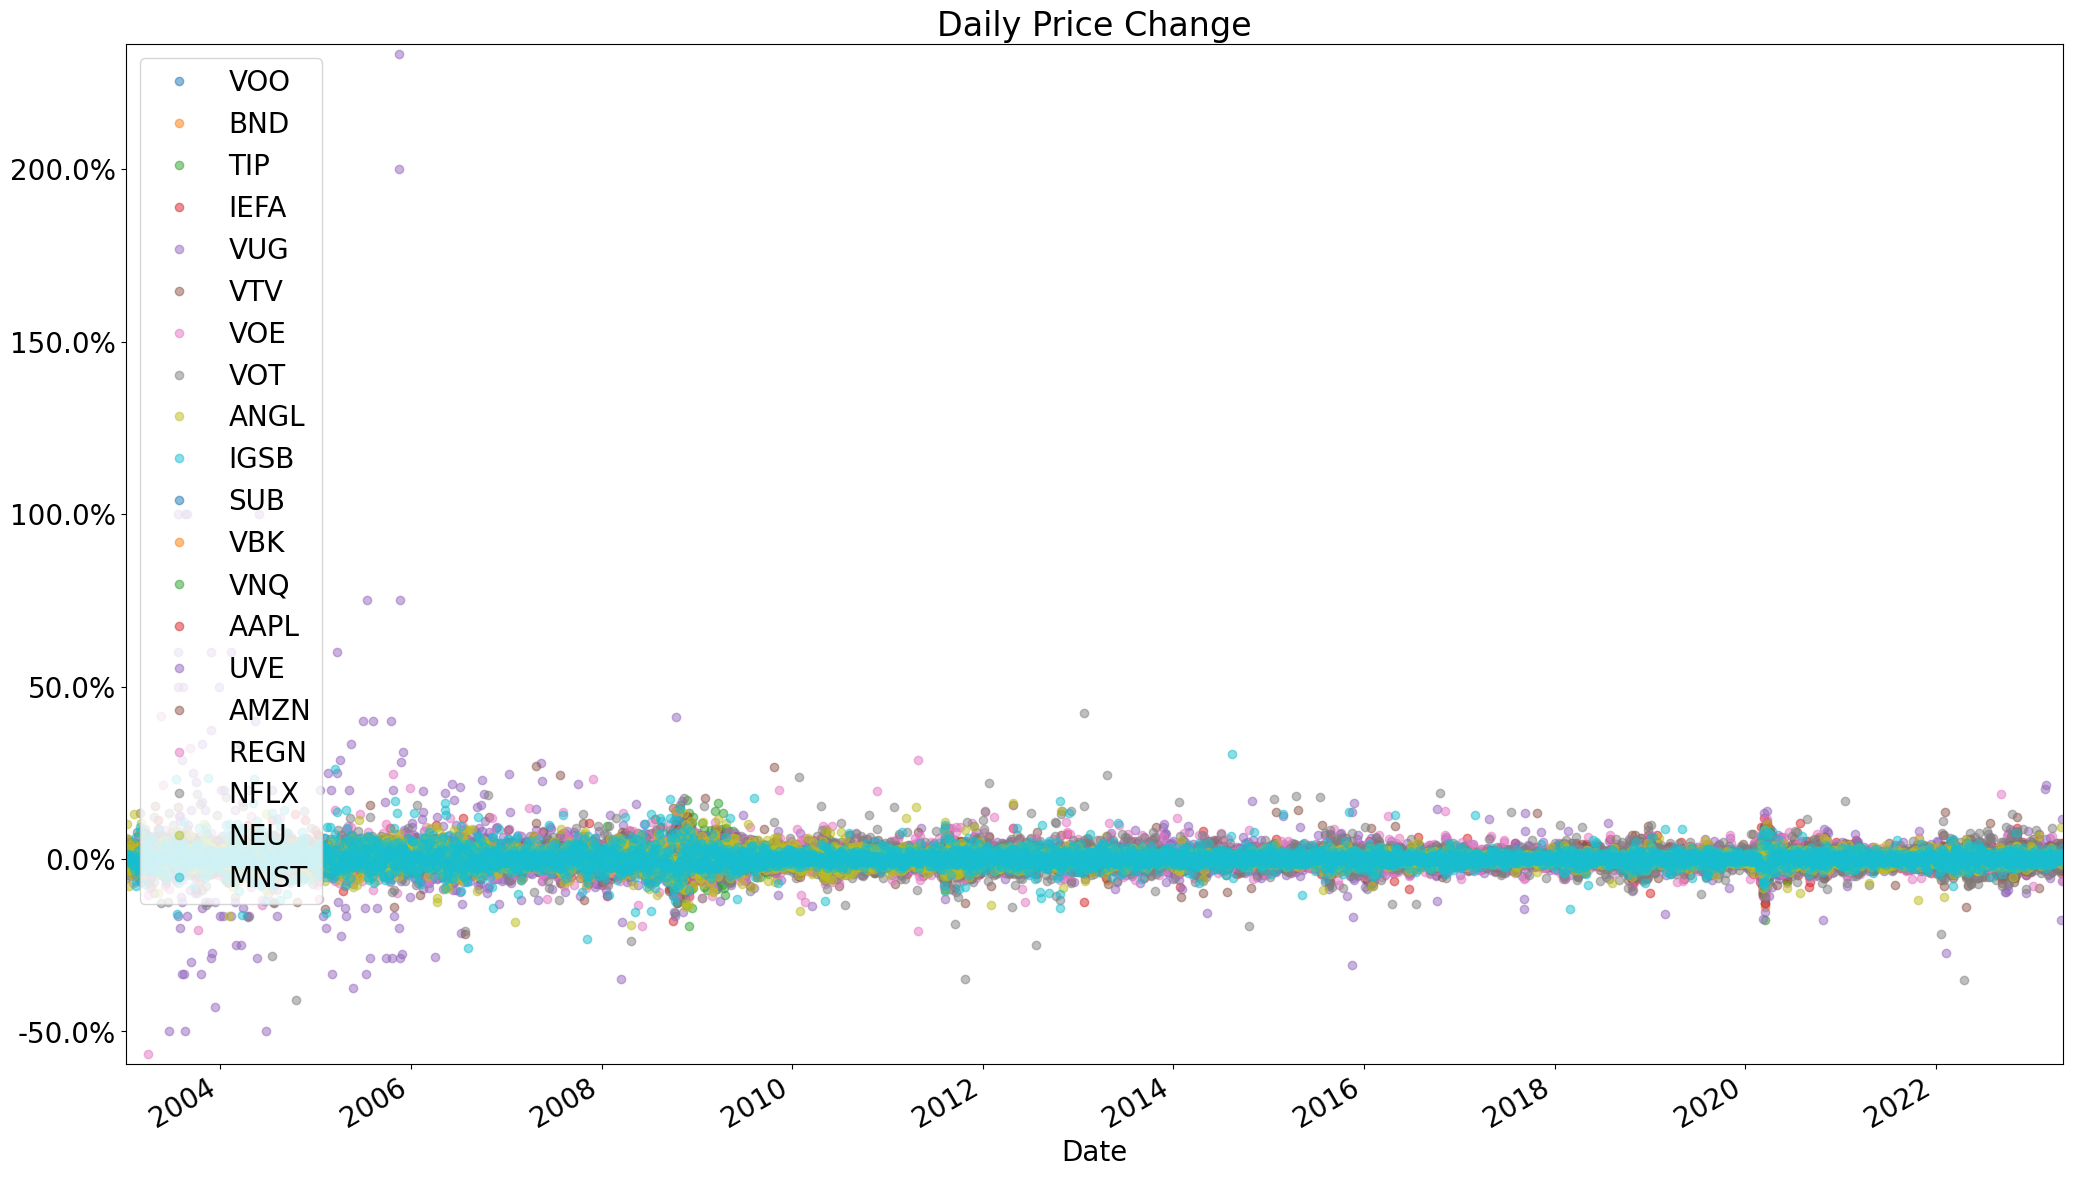

In [11]:
fig, ax = plt.subplots(figsize=(25,15))
for key in percent_df.keys():
    percent_df[key].plot.line(marker = ".", 
                                  markersize = '12',
                                  alpha = .5,
                                  ls = " ",
                                  ax = ax)
ax.set_title("Daily Price Change")

y_vals = ax.get_yticks()
ax.set_yticklabels([str(round(y, 1)) + "%" for y in y_vals])
plt.legend()

Since there are so many stocks it is hard to see exactly what is going on, but you can get a sense of how volatility each ticker is through plotting daily returns (percent change compared to the day prior). It is simple enough to zoom in only only some tickers by looking at each desired stocks individually like what is shown below.

All you do is simply input the tickers you would like to take a closer look at into the 'desired' list.

In [12]:

desired = ['VOO', 'TIP', 'ANGL', 'SUB']
separate_dict = {}

In [13]:
for ticker in desired:
    separate_dict[ticker] = percent_df[ticker]

separate_df = pd.DataFrame(separate_dict)
    

In [14]:
separate_df

VOO       TIP      ANGL       SUB
Date                                              
2003-01-02       NaN       NaN       NaN       NaN
2003-01-03       NaN       NaN       NaN       NaN
2003-01-06       NaN       NaN       NaN       NaN
2003-01-07       NaN       NaN       NaN       NaN
2003-01-08       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2023-05-01 -0.068048 -0.831124 -0.651238 -0.256236
2023-05-02 -1.121035  0.763571  0.036417  0.134705
2023-05-03 -0.696672  0.456496 -0.036404  0.144135
2023-05-04 -0.730898 -0.027264 -0.546248  0.028784
2023-05-05  1.835327 -0.200001  0.439403 -0.019181

[5121 rows x 4 columns]

Text(0, 0.5, 'daily returns')

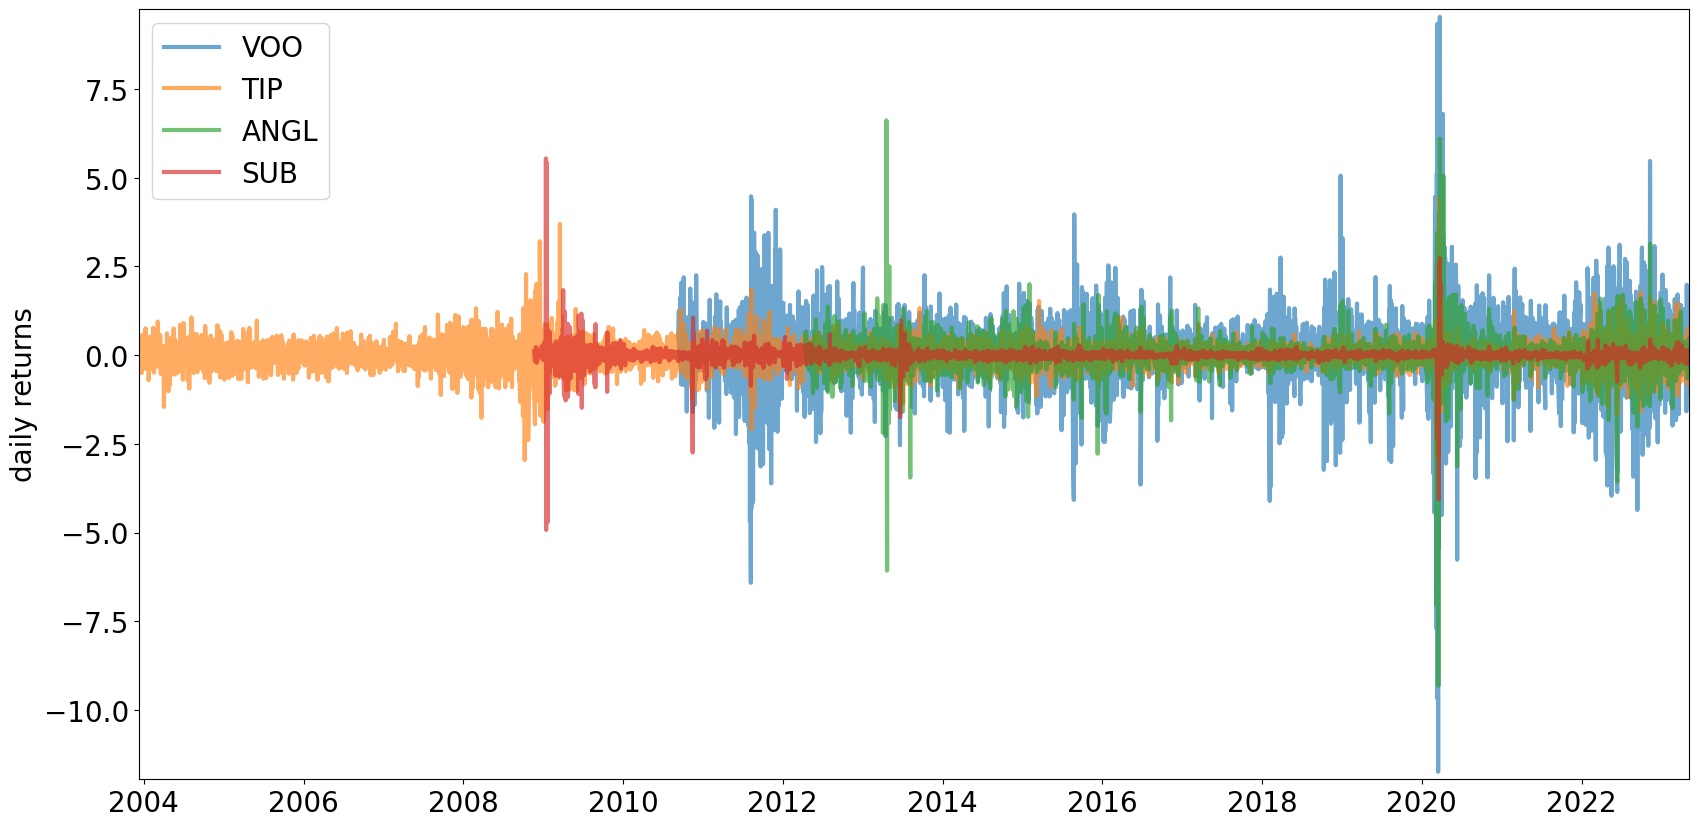

In [15]:
plt.figure(figsize=(20,10))
for c in separate_df.columns.values:
    plt.plot(separate_df.index, separate_df[c], lw=3, alpha=0.65,label=c)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('daily returns')

SUB, ANGL, and VOO have each experienced distinctive spikes since their inception. Fromn the above plot it looks like SUB is more stable than ANGL and VOO. SUB and TIP would appears to be the most stable stocks from the list.

# Calculate Portfolio Statistics

In [16]:
stats_df = stats.gather_statistics(percent_df, sample = True)

In [17]:
stats_df

VOO     BND    TIP    IEFA     VUG     VTV     VOE    VOT  \
mean       0.055   0.012  0.015   0.031   0.046   0.039   0.041  0.045   
median     0.071   0.024  0.018   0.065   0.086   0.076   0.087  0.114   
variance   1.224   0.107  0.160   1.151   1.605   1.491   1.974  2.143   
S.D.       1.106   0.327  0.399   1.073   1.267   1.221   1.405  1.464   
skewness  -0.500  -0.555  0.202  -0.996  -0.238  -0.299  -0.329 -0.382   
kurtosis  13.061  39.982  9.735  13.462  10.284  12.462  10.597  8.780   

            ANGL     IGSB      SUB    VBK     VNQ   AAPL      UVE    AMZN  \
mean       0.027    0.010    0.005  0.044   0.046  0.152    0.338   0.122   
median     0.036    0.010    0.009  0.105   0.083  0.114    0.000   0.065   
variance   0.399    0.073    0.067  2.197   3.548  4.478   54.395   6.072   
S.D.       0.631    0.270    0.258  1.482   1.884  2.116    7.375   2.464   
skewness  -1.619   -0.600    0.666 -0.438   0.001  0.126   13.042   0.828   
kurtosis  43.348  192.275  210.527  6.917  16.567  5.039  343.757  13.662   

            REGN    NFLX    NEU    MNST  
mean       0.123   0.177  0.112   0.180  
median     0.000   0.035  0.059   0.064  
variance   9.937  11.749  5.517   7.915  
S.D.       3.152   3.428  2.349   2.813  
skewness   0.133  -0.152 -0.080   0.855  
kurtosis  34.070  19.212  7.774  14.263

# Calculation of a Correlation & Covariance Matrix

In [18]:
abs_corr = portfolio_df.corr()
abs_corr

VOO       BND       TIP      IEFA       VUG       VTV       VOE  \
VOO   1.000000  0.871862  0.920865  0.938916  0.990267  0.988454  0.979293   
BND   0.871862  1.000000  0.962773  0.779393  0.862545  0.846577  0.866898   
TIP   0.920865  0.962773  1.000000  0.842629  0.858477  0.855425  0.873736   
IEFA  0.938916  0.779393  0.842629  1.000000  0.934186  0.927366  0.941230   
VUG   0.990267  0.862545  0.858477  0.934186  1.000000  0.970333  0.955923   
VTV   0.988454  0.846577  0.855425  0.927366  0.970333  1.000000  0.994110   
VOE   0.979293  0.866898  0.873736  0.941230  0.955923  0.994110  1.000000   
VOT   0.988884  0.880534  0.885708  0.949183  0.995212  0.973900  0.969387   
ANGL  0.969335  0.902649  0.889019  0.939379  0.963178  0.957292  0.952971   
IGSB  0.944076  0.985734  0.973432  0.866363  0.891398  0.872741  0.889827   
SUB   0.938754  0.973671  0.959009  0.859580  0.936058  0.926917  0.922317   
VBK   0.971851  0.901907  0.891235  0.954340  0.982642  0.968361  0.965322   
VNQ   0.961351  0.896811  0.889612  0.892836  0.941479  0.971110  0.978153   
AAPL  0.955450  0.762980  0.803818  0.864232  0.967973  0.929275  0.899550   
UVE   0.394522  0.643989  0.646191  0.180235  0.588344  0.690103  0.671127   
AMZN  0.939862  0.862541  0.822119  0.877015  0.973412  0.919506  0.895615   
REGN  0.831068  0.844857  0.867998  0.633938  0.872689  0.907097  0.906236   
NFLX  0.878161  0.857829  0.789503  0.849289  0.932903  0.882763  0.860697   
NEU   0.546393  0.867397  0.869676  0.275599  0.711215  0.784654  0.793211   
MNST  0.960783  0.888481  0.888252  0.871275  0.956858  0.973326  0.968243   

           VOT      ANGL      IGSB       SUB       VBK       VNQ      AAPL  \
VOO   0.988884  0.969335  0.944076  0.938754  0.971851  0.961351  0.955450   
BND   0.880534  0.902649  0.985734  0.973671  0.901907  0.896811  0.762980   
TIP   0.885708  0.889019  0.973432  0.959009  0.891235  0.889612  0.803818   
IEFA  0.949183  0.939379  0.866363  0.859580  0.954340  0.892836  0.864232   
VUG   0.995212  0.963178  0.891398  0.936058  0.982642  0.941479  0.967973   
VTV   0.973900  0.957292  0.872741  0.926917  0.968361  0.971110  0.929275   
VOE   0.969387  0.952971  0.889827  0.922317  0.965322  0.978153  0.899550   
VOT   1.000000  0.971169  0.904013  0.949795  0.993695  0.956585  0.942269   
ANGL  0.971169  1.000000  0.951677  0.945185  0.970077  0.946085  0.886813   
IGSB  0.904013  0.951677  1.000000  0.989687  0.920379  0.893969  0.818633   
SUB   0.949795  0.945185  0.989687  1.000000  0.953547  0.942701  0.856029   
VBK   0.993695  0.970077  0.920379  0.953547  1.000000  0.957867  0.915770   
VNQ   0.956585  0.946085  0.893969  0.942701  0.957867  1.000000  0.868723   
AAPL  0.942269  0.886813  0.818633  0.856029  0.915770  0.868723  1.000000   
UVE   0.570857  0.324305  0.606617  0.535712  0.673014  0.709389  0.453617   
AMZN  0.962400  0.949087  0.878187  0.913175  0.960359  0.888932  0.927428   
REGN  0.868761  0.716759  0.857926  0.856371  0.882800  0.904435  0.838072   
NFLX  0.929714  0.910091  0.859138  0.886332  0.942102  0.856824  0.852251   
NEU   0.715083  0.465825  0.836259  0.769893  0.795230  0.839756  0.603394   
MNST  0.959189  0.935164  0.906025  0.935669  0.960467  0.950131  0.916235   

           UVE      AMZN      REGN      NFLX       NEU      MNST  
VOO   0.394522  0.939862  0.831068  0.878161  0.546393  0.960783  
BND   0.643989  0.862541  0.844857  0.857829  0.867397  0.888481  
TIP   0.646191  0.822119  0.867998  0.789503  0.869676  0.888252  
IEFA  0.180235  0.877015  0.633938  0.849289  0.275599  0.871275  
VUG   0.588344  0.973412  0.872689  0.932903  0.711215  0.956858  
VTV   0.690103  0.919506  0.907097  0.882763  0.784654  0.973326  
VOE   0.671127  0.895615  0.906236  0.860697  0.793211  0.968243  
VOT   0.570857  0.962400  0.868761  0.929714  0.715083  0.959189  
ANGL  0.324305  0.949087  0.716759  0.910091  0.465825  0.935164  
IGSB  0.606617  0.878187  0.857926  0.859138  0.836259  0.90602

In [19]:
portfolio_corr = percent_df.corr()
portfolio_corr

VOO       BND       TIP      IEFA       VUG       VTV       VOE  \
VOO   1.000000 -0.000333 -0.080692  0.860829  0.961311  0.955173  0.933569   
BND  -0.000333  1.000000  0.672890  0.094568 -0.013879 -0.078470 -0.057442   
TIP  -0.080692  0.672890  1.000000  0.032973 -0.103609 -0.142902 -0.130832   
IEFA  0.860829  0.094568  0.032973  1.000000  0.803633  0.845874  0.843537   
VUG   0.961311 -0.013879 -0.103609  0.803633  1.000000  0.875125  0.873819   
VTV   0.955173 -0.078470 -0.142902  0.845874  0.875125  1.000000  0.967195   
VOE   0.933569 -0.057442 -0.130832  0.843537  0.873819  0.967195  1.000000   
VOT   0.939488 -0.026266 -0.101724  0.810520  0.956780  0.881398  0.907421   
ANGL  0.572339  0.307789  0.217131  0.558608  0.543515  0.549426  0.563851   
IGSB  0.225969  0.473071  0.304376  0.285776  0.149984  0.123853  0.146425   
SUB   0.136012  0.225560  0.124363  0.187009  0.113985  0.119215  0.136640   
VBK   0.908967 -0.036833 -0.091040  0.795506  0.920092  0.865731  0.909932   
VNQ   0.768566 -0.024769 -0.073132  0.664021  0.701236  0.795929  0.826247   
AAPL  0.690765 -0.043007 -0.098229  0.556035  0.661336  0.538444  0.575957   
UVE   0.390733  0.032272 -0.011877  0.345674  0.145690  0.153829  0.365353   
AMZN  0.591910 -0.029868 -0.062584  0.483931  0.615637  0.475325  0.491435   
REGN  0.390186 -0.023013 -0.069735  0.338115  0.434568  0.408589  0.423444   
NFLX  0.381738 -0.019432 -0.037577  0.348190  0.412149  0.308055  0.334711   
NEU   0.520013 -0.058044 -0.092395  0.428457  0.507088  0.544718  0.602996   
MNST  0.479178 -0.015855 -0.045355  0.427833  0.407920  0.384550  0.449257   

           VOT      ANGL      IGSB       SUB       VBK       VNQ      AAPL  \
VOO   0.939488  0.572339  0.225969  0.136012  0.908967  0.768566  0.690765   
BND  -0.026266  0.307789  0.473071  0.225560 -0.036833 -0.024769 -0.043007   
TIP  -0.101724  0.217131  0.304376  0.124363 -0.091040 -0.073132 -0.098229   
IEFA  0.810520  0.558608  0.285776  0.187009  0.795506  0.664021  0.556035   
VUG   0.956780  0.543515  0.149984  0.113985  0.920092  0.701236  0.661336   
VTV   0.881398  0.549426  0.123853  0.119215  0.865731  0.795929  0.538444   
VOE   0.907421  0.563851  0.146425  0.136640  0.909932  0.826247  0.575957   
VOT   1.000000  0.554484  0.157393  0.126013  0.962898  0.731662  0.644459   
ANGL  0.554484  1.000000  0.486293  0.384447  0.543070  0.517034  0.368935   
IGSB  0.157393  0.486293  1.000000  0.338895  0.131746  0.101152  0.074118   
SUB   0.126013  0.384447  0.338895  1.000000  0.115561  0.154721  0.062329   
VBK   0.962898  0.543070  0.131746  0.115561  1.000000  0.744201  0.581090   
VNQ   0.731662  0.517034  0.101152  0.154721  0.744201  1.000000  0.432081   
AAPL  0.644459  0.368935  0.074118  0.062329  0.581090  0.432081  1.000000   
UVE   0.327147  0.214944  0.126476  0.046687  0.152725  0.114227  0.091812   
AMZN  0.582677  0.315378  0.076683  0.059443  0.551590  0.411024  0.443079   
REGN  0.454051  0.202141  0.030155  0.063638  0.465031  0.352598  0.266308   
NFLX  0.423130  0.185596  0.034299  0.046619  0.394959  0.254183  0.279980   
NEU   0.577287  0.220986  0.049353  0.047621  0.549157  0.470912  0.302321   
MNST  0.471057  0.283319  0.080985  0.090627  0.394951  0.356285  0.257766   

           UVE      AMZN      REGN      NFLX       NEU      MNST  
VOO   0.390733  0.591910  0.390186  0.381738  0.520013  0.479178  
BND   0.032272 -0.029868 -0.023013 -0.019432 -0.058044 -0.015855  
TIP  -0.011877 -0.062584 -0.069735 -0.037577 -0.092395 -0.045355  
IEFA  0.345674  0.483931  0.338115  0.348190  0.428457  0.427833  
VUG   0.145690  0.615637  0.434568  0.412149  0.507088  0.407920  
VTV   0.153829  0.475325  0.408589  0.308055  0.544718  0.384550  
VOE   0.365353  0.491435  0.423444  0.334711  0.602996  0.449257  
VOT   0.327147  0.582677  0.454051  0.423130  0.577287  0.471057  
ANGL  0.214944  0.315378  0.202141  0.185596  0.220986  0.283319  
IGSB  0.126476  0.076683  0.030155  0.034299  0.049353  0.08098

In [20]:
portfolio_cov = percent_df.cov()
portfolio_cov

VOO       BND       TIP      IEFA       VUG       VTV       VOE  \
VOO   1.224237 -0.000110 -0.033267  1.014916  1.319618  1.131603  1.228438   
BND  -0.000110  0.106647  0.090788  0.031543 -0.006125 -0.033458 -0.026748   
TIP  -0.033267  0.090788  0.159516  0.013014 -0.052474 -0.069763 -0.075096   
IEFA  1.014916  0.031543  0.013014  1.151248  1.079692  0.952605  1.056603   
VUG   1.319618 -0.006125 -0.052474  1.079692  1.604514  1.353485  1.635233   
VTV   1.131603 -0.033458 -0.069763  0.952605  1.353485  1.490814  1.747804   
VOE   1.228438 -0.026748 -0.075096  1.056603  1.635233  1.747804  1.973629   
VOT   1.341140 -0.012725 -0.060835  1.097615  1.865528  1.659519  1.865975   
ANGL  0.393307  0.059288  0.049812  0.382878  0.425022  0.360681  0.411795   
IGSB  0.046753  0.041937  0.033793  0.060997  0.054432  0.043440  0.056073   
SUB   0.026070  0.017502  0.012627  0.033092  0.037740  0.037150  0.047634   
VBK   1.394049 -0.018724 -0.053949  1.148200  1.727351  1.566651  1.965785   
VNQ   1.097935 -0.016082 -0.055083  0.898754  1.691742  1.853079  2.276895   
AAPL  1.375146 -0.028478 -0.082540  1.092870  1.762653  1.383329  1.637490   
UVE   1.176396  0.032828 -0.031250  1.051571  1.203481  1.224863  1.665113   
AMZN  1.366891 -0.023902 -0.061103  1.071086  1.906024  1.418516  1.682440   
REGN  1.052390 -0.020938 -0.081359  0.798157  1.608931  1.458162  1.657231   
NFLX  1.360954 -0.020926 -0.050626  1.124531  1.755821  1.265013  1.538352   
NEU   0.963273 -0.040588 -0.085814  0.692599  1.497371  1.550448  1.831323   
MNST  1.068124 -0.012211 -0.049939  0.870819  1.424392  1.294336  1.511409   

           VOT      ANGL      IGSB       SUB       VBK       VNQ      AAPL  \
VOO   1.341140  0.393307  0.046753  0.026070  1.394049  1.097935  1.375146   
BND  -0.012725  0.059288  0.041937  0.017502 -0.018724 -0.016082 -0.028478   
TIP  -0.060835  0.049812  0.033793  0.012627 -0.053949 -0.055083 -0.082540   
IEFA  1.097615  0.382878  0.060997  0.033092  1.148200  0.898754  1.092870   
VUG   1.865528  0.425022  0.054432  0.037740  1.727351  1.691742  1.762653   
VTV   1.659519  0.360681  0.043440  0.037150  1.566651  1.853079  1.383329   
VOE   1.865975  0.411795  0.056073  0.047634  1.965785  2.276895  1.637490   
VOT   2.142538  0.439501  0.062719  0.045182  2.167400  2.100754  1.909042   
ANGL  0.439501  0.398576  0.059775  0.039556  0.457793  0.406685  0.426562   
IGSB  0.062719  0.059775  0.072855  0.017717  0.055107  0.054044  0.040491   
SUB   0.045182  0.039556  0.017717  0.066680  0.044539  0.072998  0.029877   
VBK   2.167400  0.457793  0.055107  0.044539  2.196620  2.091091  1.812148   
VNQ   2.100754  0.406685  0.054044  0.072998  2.091091  3.547587  1.702701   
AAPL  1.909042  0.426562  0.040491  0.029877  1.812148  1.702701  4.477686   
UVE   1.553479  0.378463  0.106799  0.033101  1.476126  1.343658  1.429260   
AMZN  2.078421  0.410540  0.050523  0.034192  1.998138  1.885433  2.310305   
REGN  1.851501  0.283526  0.022702  0.042418  2.014501  1.919563  1.776354   
NFLX  2.026241  0.361798  0.030405  0.039035  1.968719  1.587213  2.030721   
NEU   1.826729  0.214941  0.028728  0.024159  1.897352  2.029067  1.502588   
MNST  1.651174  0.358915  0.051676  0.048462  1.613627  1.761302  1.534560   

            UVE      AMZN      REGN       NFLX       NEU      MNST  
VOO    1.176396  1.366891  1.052390   1.360954  0.963273  1.068124  
BND    0.032828 -0.023902 -0.020938  -0.020926 -0.040588 -0.012211  
TIP   -0.031250 -0.061103 -0.081359  -0.050626 -0.085814 -0.049939  
IEFA   1.051571  1.071086  0.798157   1.124531  0.692599  0.870819  
VUG    1.203481  1.906024  1.608931   1.755821  1.497371  1.424392  
VTV    1.224863  1.418516  1.458162   1.265013  1.550448  1.294336  
VOE    1.665113  1.682440  1.657231   1.538352  1.831323  1.511409  
VOT    1.553479  2.078421  1.851501   2.026241  1.826729  1.651174  
ANGL   0.378463  0.410540  0.283526   0.361798  0.214941  0.358915  
IGSB   0.106799  0.050523  0.022702   0.030

In [21]:
def corr_matrix_heatmap(data, pp=None, dim=20, chart_title = 'Default Title'):
    # Create a figure to visualize a corr matrix
    fig, ax = plt.subplots(figsize=(dim, dim))
    # use ax.imshow() to create a heatmap of correlation values
    # seismic mapping shows negative values as blue and positive values as red
    im = ax.imshow(data, norm=plt.cm.colors.Normalize(-1, 1), cmap="seismic")
    # create a list of labels, stacking each word in a label by replacing " "
    # with "\n"
    labels = data.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ", "\n") for label in labels]
    # adjust font size according to the number of variables visualized
    tick_font_size = 200 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({'font.size': tick_font_size})
    # prepare space for label of each column
    x_ticks = np.arange(num_vars)
    # select labels and rotate them 90 degrees so that they are vertical
    plt.xticks(x_ticks, tick_labels, fontsize=tick_font_size, color='k')
    # prepare space for label of each row
    y_ticks = np.arange(len(labels))
    # select labels
    plt.yticks(y_ticks, tick_labels, fontsize=tick_font_size)
    # show values in each tile of the heatmap
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(i,
                           j,
                           str(round(data.values[i][j], 2)),
                           fontsize=val_font_size,
                           ha="center",
                           va="center",
                           color="w")
    # Create title with Times New Roman Font
    title_font = {"fontname": "Garamond"}  # TNR is dull and outdated
    plt.title(str(chart_title), fontsize=50, **title_font)

    #Call scale to show value of colors
    cbar = fig.colorbar(im)
    plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches='tight')
    plt.close()


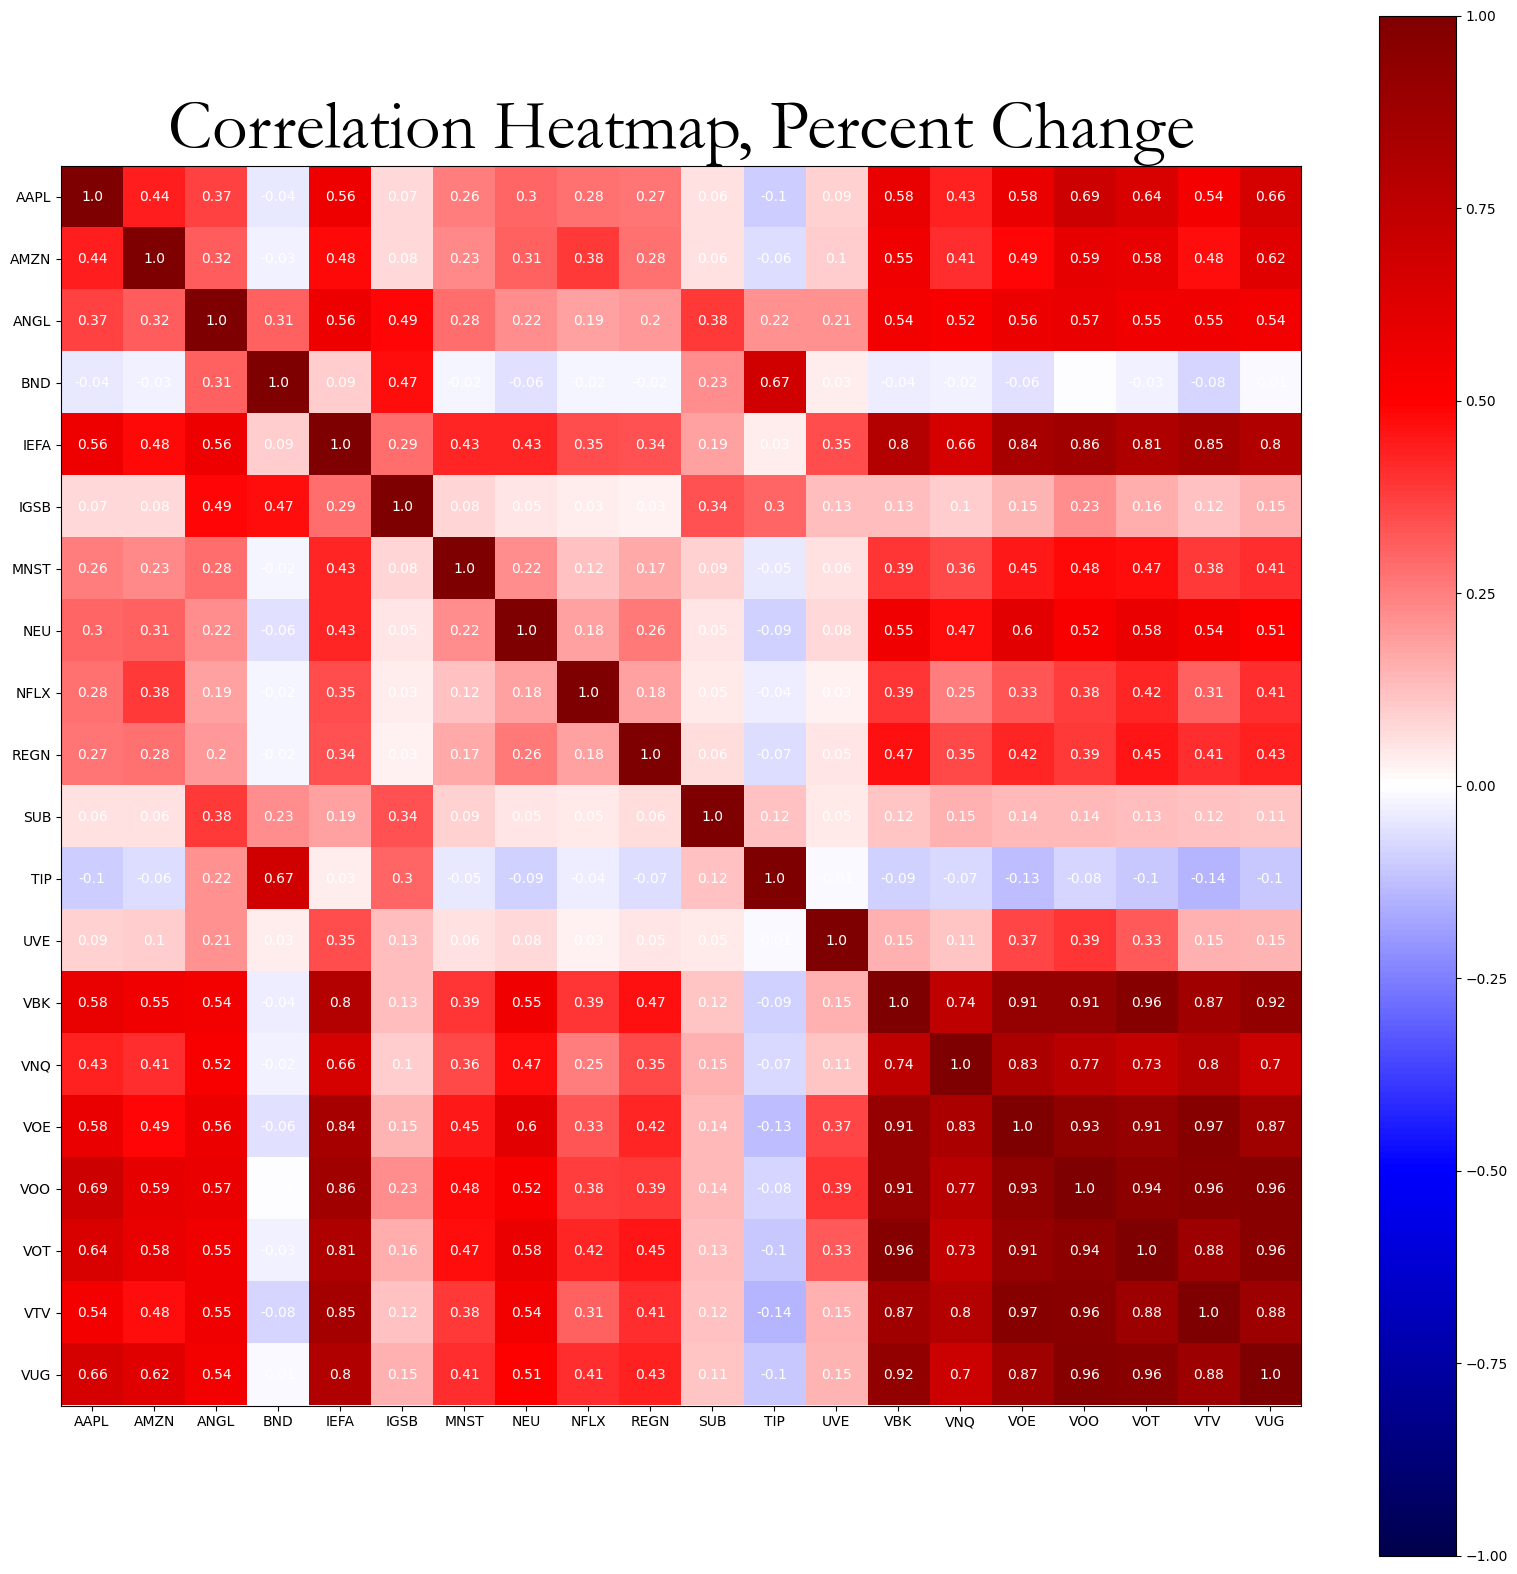

In [22]:
corr_matrix_heatmap(portfolio_corr.sort_index(axis=1).sort_index(axis=0), pp=None, 
                    chart_title='Correlation Heatmap, Percent Change')

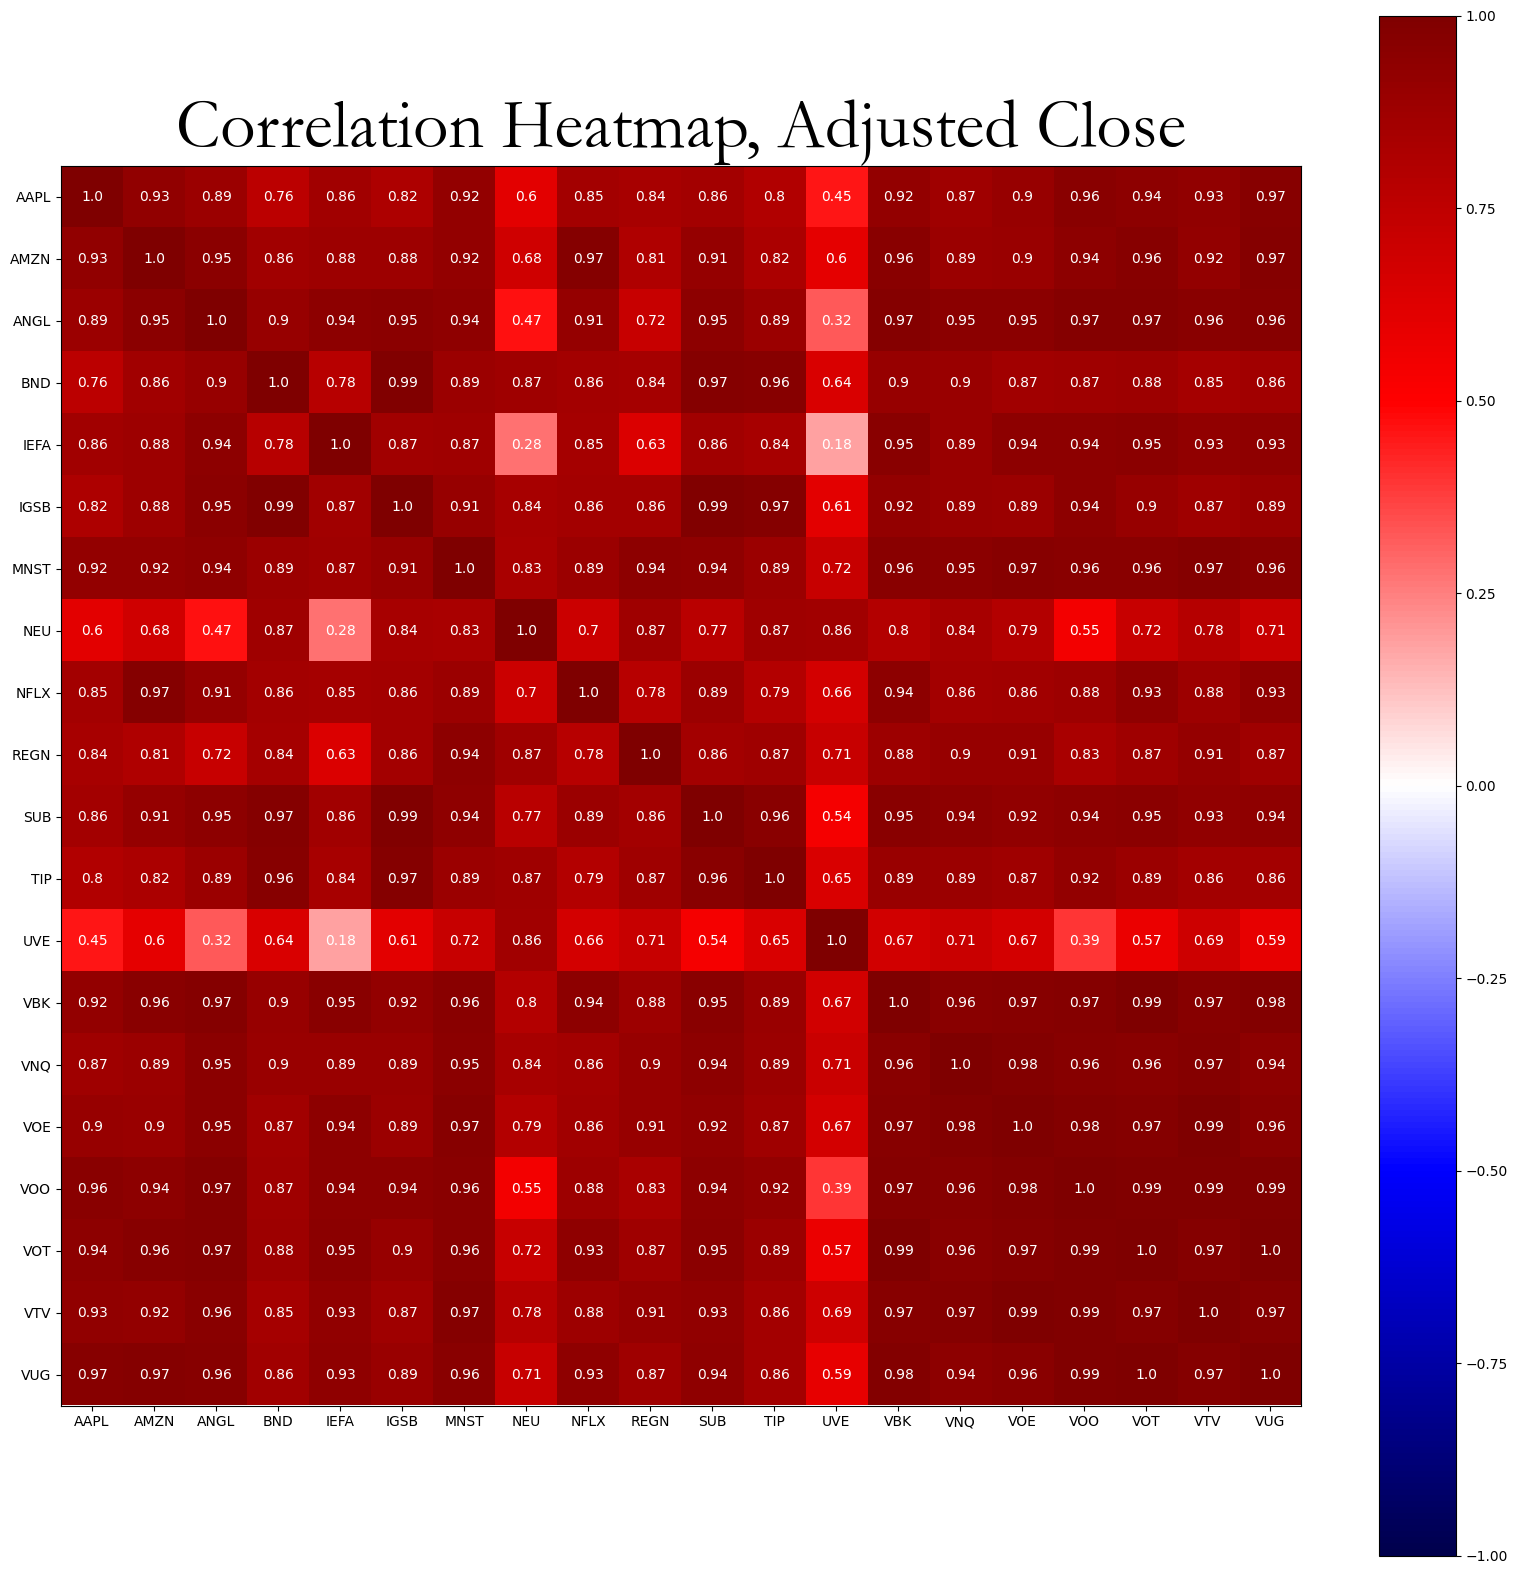

In [23]:
corr_matrix_heatmap(abs_corr.sort_index(axis=1).sort_index(axis=0), pp=None, 
                    chart_title='Correlation Heatmap, Adjusted Close')

Upon first glance at these heatmaps, it looks obvious that there could be a lot more variety in the portfolio. Since most of the vanguard hexchange traded funds are highly correlated with each other. This isn't the best since it departs from the concept of diversification. The value in having a heatmap like this is clear though, from a visual standpoint you're able to tell right away that this portfolio is going to perform in a particular way due to the weight of stock tickers correlated similary to one another.

# The Efficient Frontier

##### What is the Efficient Frontier?
It's simply a graphical representation of a number of efficient portfolios. Those are portfolios which offer the greatest return for their level of risk which is better described as the variance or standard deviation of returns (John 1). GMV refers to the global minimum variance, everything above it is refrred to as the 'efficient frontier'.
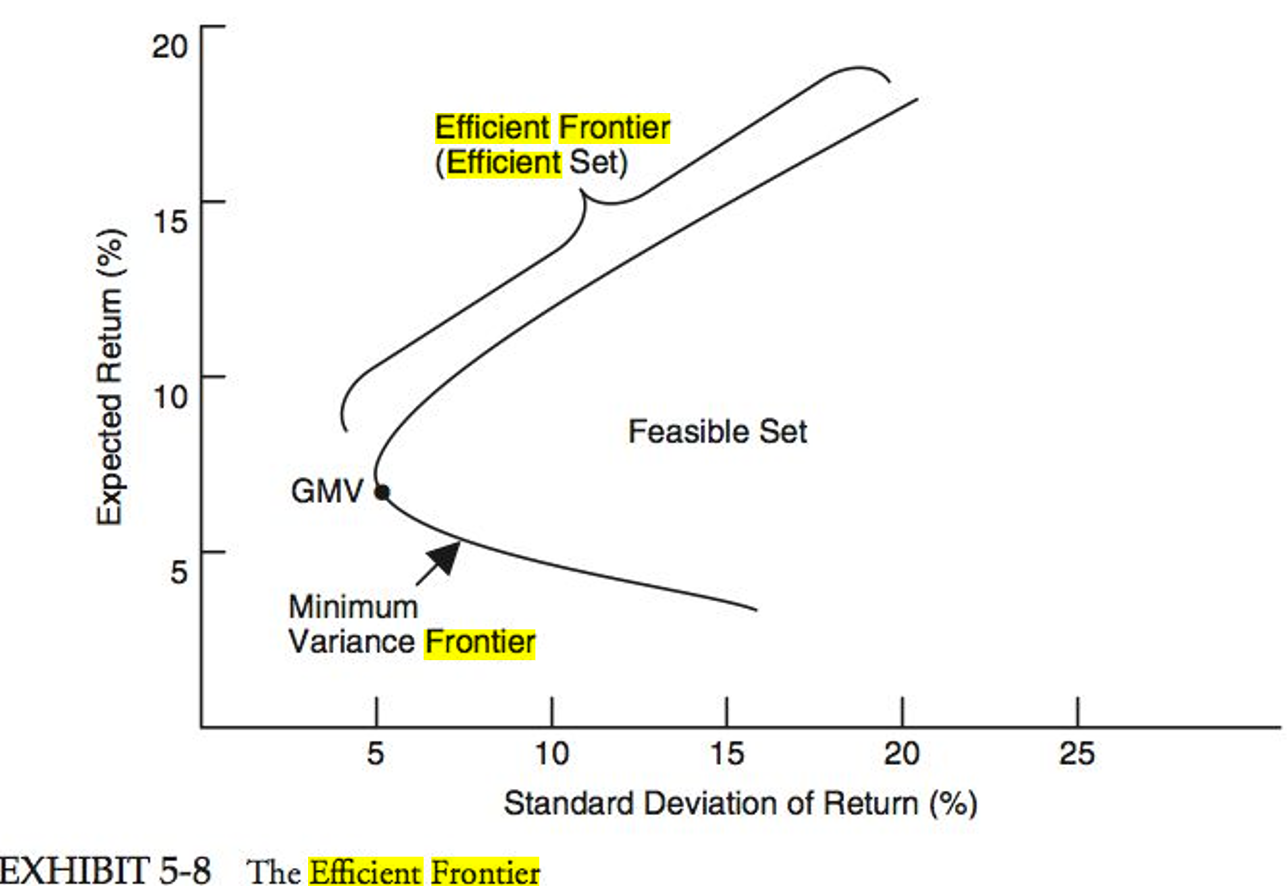 Image credits: (John 1)

###### Building the Efficient Frontier

In order to draw an efficient frontier using python we will need to calculate many different portfolios. First we specify how many portfolios we would like, for the purposes of this model we will use 10000 portfolios due to computational resource constraints. After that we need to initialize lists which we will populate in the following for loop.

In [24]:
# List initialization
portfolioReturns = []
portfolioVolatility = []
portfolioTickerWeight = []

# Assign the number of tickers
NumberofTickers = len(portfolio_df.columns)

# Choose the number of portfolios to generate
NumberOfPortfolios = 50000

# Calculate the annualized portfolio returns
TickerReturns = portfolio_df.resample('Y').last().pct_change().mean().dropna()

# Iterate over the number of portfolios
for portfolio in range(NumberOfPortfolios):
    # Calculate random weights and assign it to array 'weights'
    weights = np.random.random(NumberofTickers)
    weights /= np.sum(weights)
    
    # Append the calculated weights to the list of ticker weights
    portfolioTickerWeight.append(weights)
    
    # Calculate the dot product of the weights and returns
    returns = np.dot(weights, TickerReturns)
    
    # Append the calculated returns to the list of portfolio returns
    portfolioReturns.append(returns)
    
    # Calculate the volatility and append to the list of portfolio volatility
    annualized_sd = np.sqrt(np.dot(weights.T, np.dot(portfolio_cov, weights))) * np.sqrt(252) / 100
    
    portfolioVolatility.append(annualized_sd)

In [25]:
# Pass all the data to a dictionary 'plot_data'
plot_data = {'Return':portfolioReturns,'Volatility':portfolioVolatility}

In [26]:
portfolio_df.columns.tolist()

['VOO',
 'BND',
 'TIP',
 'IEFA',
 'VUG',
 'VTV',
 'VOE',
 'VOT',
 'ANGL',
 'IGSB',
 'SUB',
 'VBK',
 'VNQ',
 'AAPL',
 'UVE',
 'AMZN',
 'REGN',
 'NFLX',
 'NEU',
 'MNST']

In [27]:
dftest = pd.DataFrame(plot_data)

In [28]:
dftest

Return  Volatility
0      0.258209    0.190351
1      0.177720    0.150346
2      0.257554    0.188891
3      0.295876    0.199998
4      0.303812    0.203359
...         ...         ...
49995  0.214893    0.181365
49996  0.234385    0.185497
49997  0.219364    0.183997
49998  0.278927    0.205734
49999  0.213905    0.164190

[50000 rows x 2 columns]

In [29]:
# Iterate over the rows and for every ticker in the list, populate a column with the weights
for counter, ticker in enumerate(portfolio_df.columns.tolist()):
    plot_data[ticker + ' Weight'] = [weight[counter] for weight in portfolioTickerWeight]

# pass the data to a dataframe in order to plot
plot_df = pd.DataFrame(plot_data)

In [30]:
plot_df

Return  Volatility  VOO Weight  BND Weight  TIP Weight  IEFA Weight  \
0      0.258209    0.190351    0.044709    0.034337    0.064089     0.083465   
1      0.177720    0.150346    0.016053    0.047269    0.053246     0.077801   
2      0.257554    0.188891    0.066717    0.045129    0.081276     0.016846   
3      0.295876    0.199998    0.048942    0.036131    0.051094     0.084991   
4      0.303812    0.203359    0.003300    0.015339    0.053517     0.060259   
...         ...         ...         ...         ...         ...          ...   
49995  0.214893    0.181365    0.001237    0.118469    0.049837     0.002032   
49996  0.234385    0.185497    0.008318    0.071034    0.033285     0.068318   
49997  0.219364    0.183997    0.013900    0.022410    0.032308     0.046172   
49998  0.278927    0.205734    0.071280    0.001201    0.030429     0.063864   
49999  0.213905    0.164190    0.067449    0.064911    0.007265     0.052964   

       VUG Weight  VTV Weight  VOE Weight  VOT Weight  ...  SUB Weight  \
0        0.027359    0.024851    0.054176    0.098500  ...    0.002520   
1        0.021875    0.053300    0.051691    0.072565  ...    0.061277   
2        0.065515    0.008325    0.062738    0.066313  ...    0.029584   
3        0.034672    0.002746    0.037582    0.076809  ...    0.015551   
4        0.027475    0.003243    0.029125    0.026713  ...    0.041159   
...           ...         ...         ...         ...  ...         ...   
49995    0.083661    0.098373    0.031695    0.096305  ...    0.071320   
49996    0.022044    0.050939    0.040973    0.064847  ...    0.054527   
49997    0.073272    0.059857    0.114200    0.036157  ...    0.048507   
49998    0.042412    0.090077    0.064530    0.053768  ...    0.032303   
49999    0.033447    0.055867    0.048534    0.018485  ...    0.084614   

       VBK Weight  VNQ Weight  AAPL Weight  UVE Weight  AMZN Weight  \
0        0.048062    0.029112     0.094024    0.065632     0.089219   
1        0.018938    0.082431     0.016133    0.019031     0.050035   
2        0.046906    0.054553     0.027436    0.082884     0.050772   
3        0.067273    0.068938     0.099733    0.072192     0.002865   
4        0.080954    0.070184     0.104775    0.075584     0.099890   
...           ...         ...          ...         ...          ...   
49995    0.107524    0.018354     0.019399    0.097270     0.066052   
49996    0.083046    0.076321     0.057776    0.077080     0.028520   
49997    0.027469    0.114217     0.059199    0.036886     0.110327   
49998    0.081819    0.014703     0.033492    0.083425     0.058419   
49999    0.033057    0.068713     0.037963    0.048215     0.005140   

       REGN Weight  NFLX Weight  NEU Weight  MNST Weight  
0         0.042247     0.075942    0.003414     0.017624  
1         0.054444     0.024447    0.044676     0.083958  
2         0.061125     0.007013    0.069923     0.076351  
3         0.036506     0.083548    0.052262     0.093682  
4         0.050894     0.033823    0.085678     0.080724  
...            ...          ...         ...          ...  
49995     0.012749     0.007347    0.021613     0.007117  
49996     0.076620     0.042176    0.053486     0.007454  
49997     0.013866     0.013109    0.023689     0.078456  
49998     0.040307     0.032578    0.070141     0.087768  
49999     0.063638     0.073024    0.083035     0.030769  

[50000 rows x 22 columns]

In [31]:
# Locate the portfolio with the lowest volatility using .argmin() method and .iloc

lowVolatilityPortfolio = plot_df.iloc[plot_df["Volatility"].argmin()]
print(lowVolatilityPortfolio)

Return         0.108492
Volatility     0.106324
VOO Weight     0.067810
BND Weight     0.106926
TIP Weight     0.122375
IEFA Weight    0.128272
VUG Weight     0.004632
VTV Weight     0.012675
VOE Weight     0.030896
VOT Weight     0.064819
ANGL Weight    0.047132
IGSB Weight    0.108117
SUB Weight     0.093832
VBK Weight     0.029947
VNQ Weight     0.020102
AAPL Weight    0.021233
UVE Weight     0.006656
AMZN Weight    0.025287
REGN Weight    0.057969
NFLX Weight    0.008204
NEU Weight     0.033130
MNST Weight    0.009987
Name: 36144, dtype: float64


In [32]:
# Locate the portfolio with the highest volatility using .argmax() method and .iloc
# See 'https://www.w3schools.com/python/pandas/ref_df_idxmin.asp'
# See 'https://www.w3schools.com/python/pandas/ref_df_idxmax.asp'
# See 'https://www.w3schools.com/python/pandas/ref_df_iloc.asp'

highVolatilityPortfolio = plot_df.iloc[plot_df["Volatility"].argmax()]
print(highVolatilityPortfolio)

Return         0.379841
Volatility     0.259348
VOO Weight     0.082712
BND Weight     0.007532
TIP Weight     0.038842
IEFA Weight    0.022887
VUG Weight     0.047221
VTV Weight     0.011881
VOE Weight     0.012219
VOT Weight     0.000570
ANGL Weight    0.005265
IGSB Weight    0.011052
SUB Weight     0.006255
VBK Weight     0.086777
VNQ Weight     0.117186
AAPL Weight    0.066458
UVE Weight     0.143110
AMZN Weight    0.008866
REGN Weight    0.124793
NFLX Weight    0.063819
NEU Weight     0.036344
MNST Weight    0.106211
Name: 8799, dtype: float64


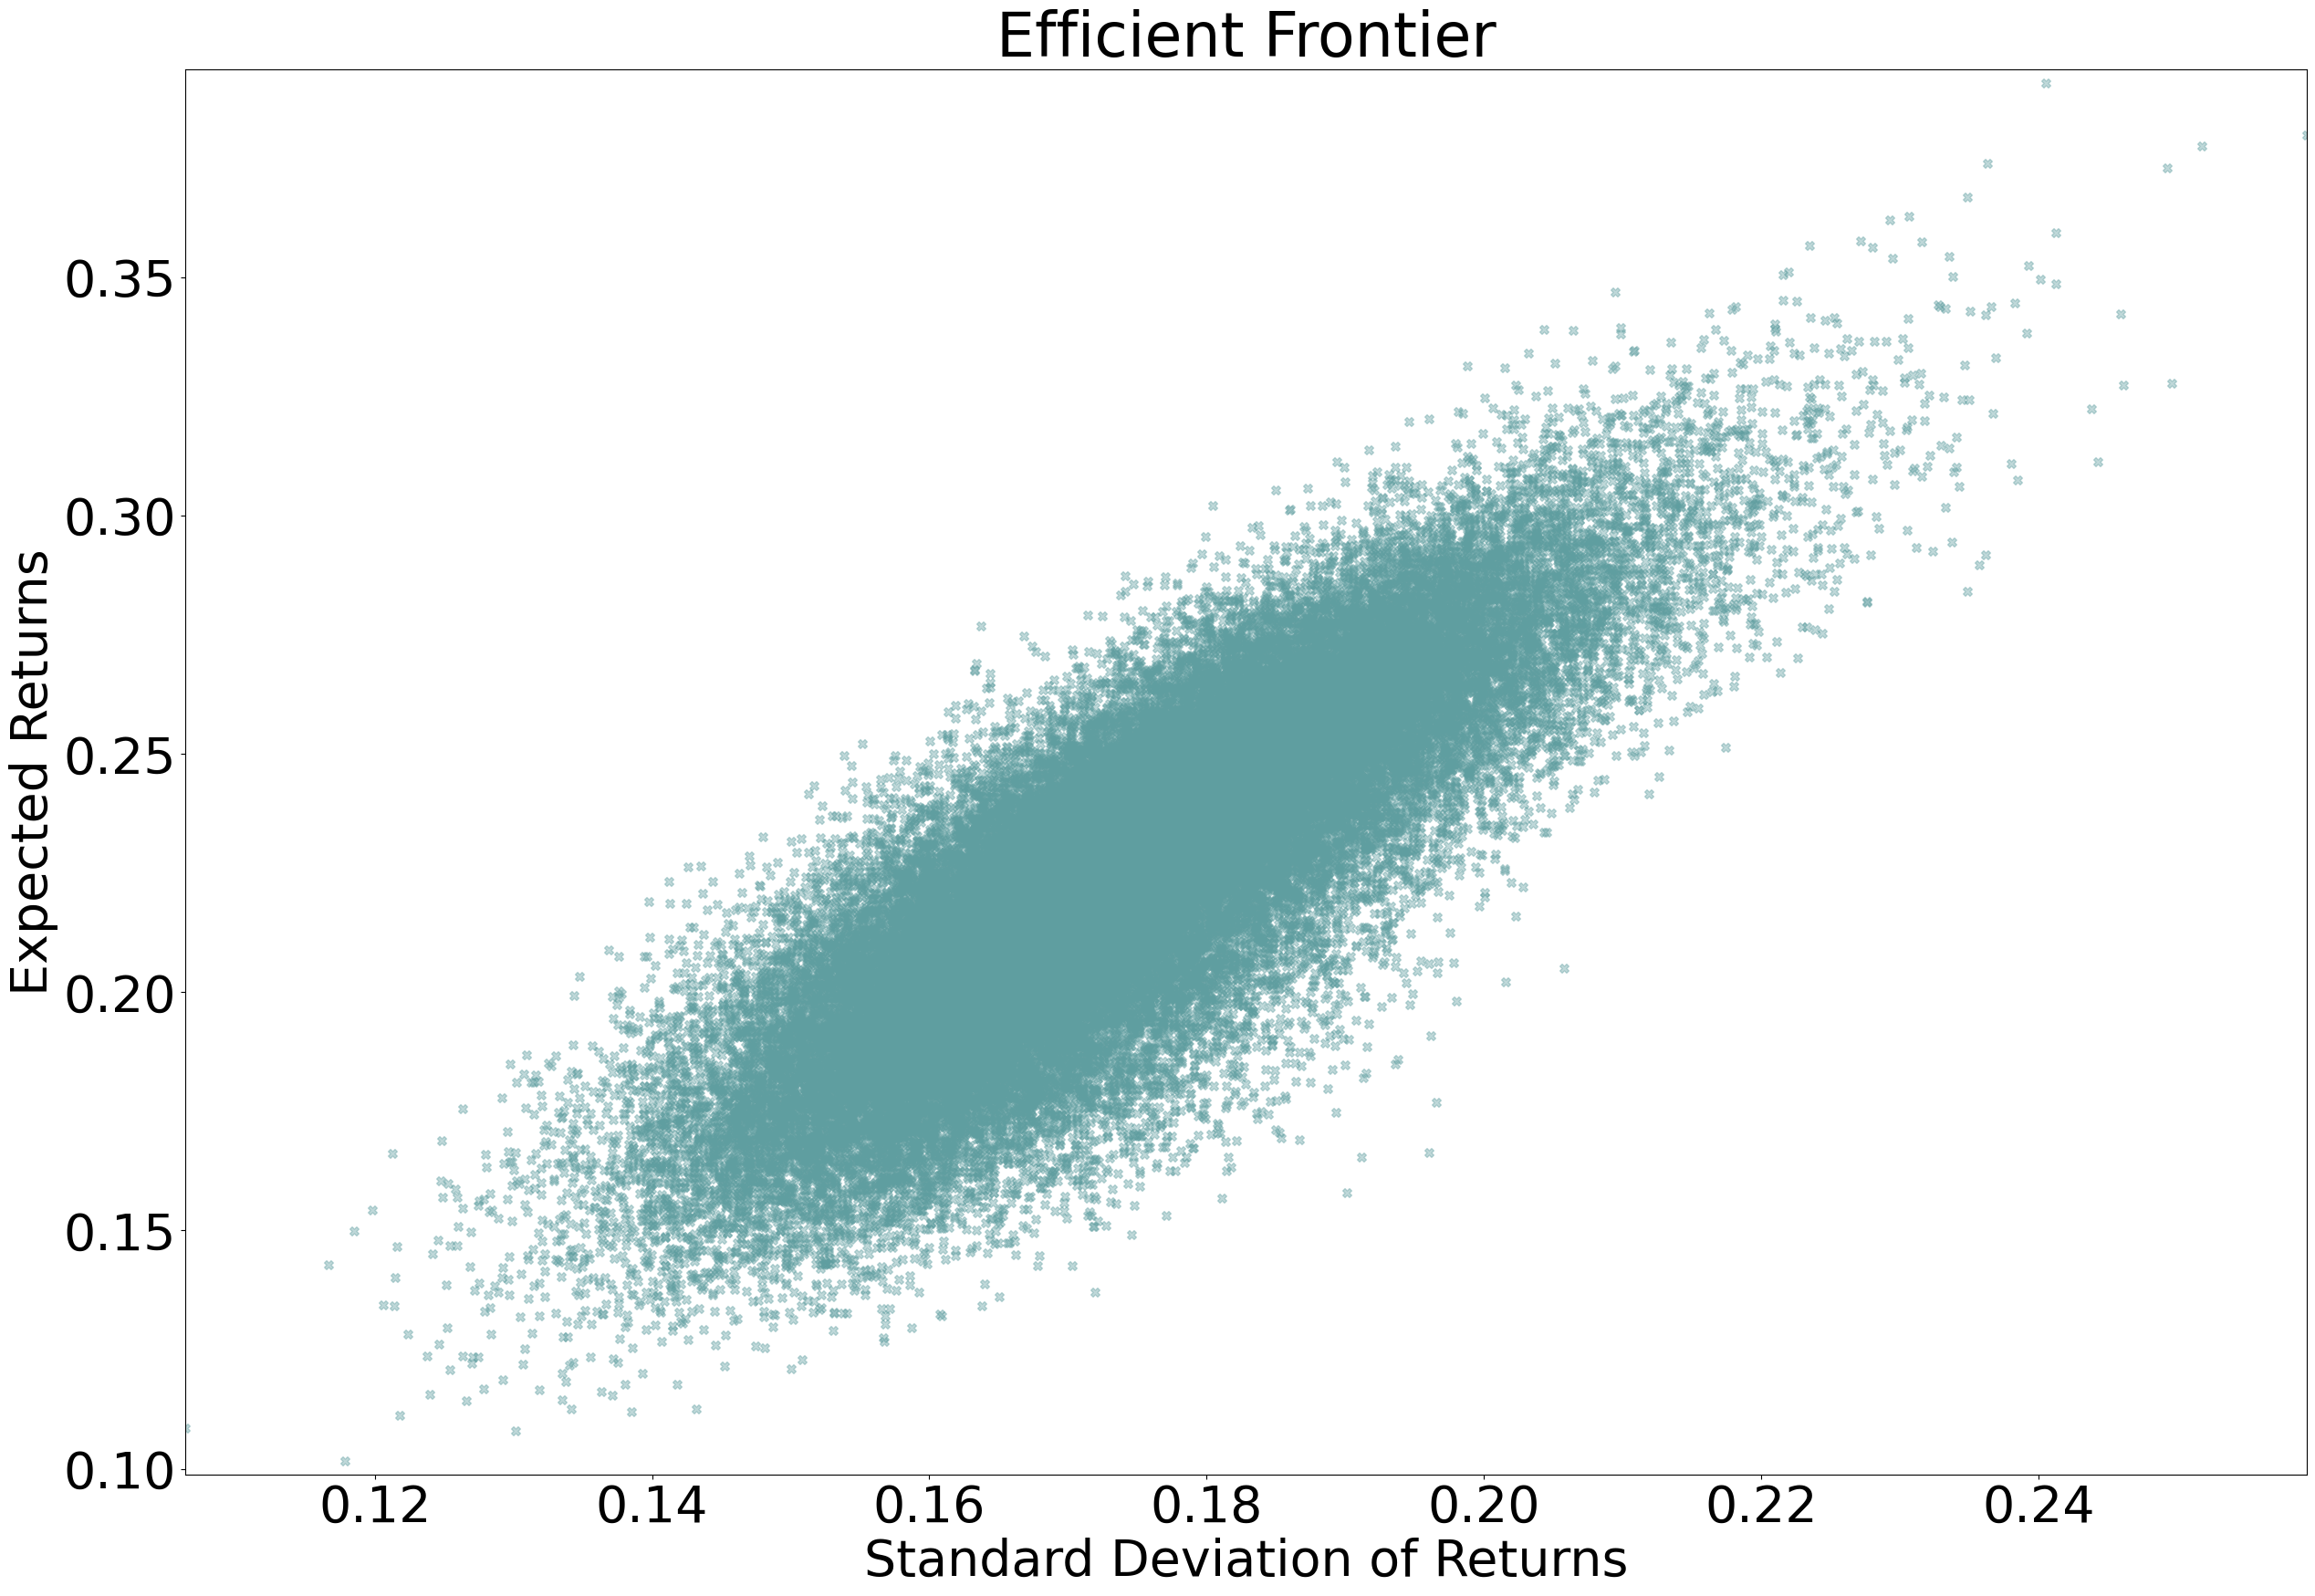

In [33]:
plt.rcParams.update({"font.size":40})
figsize = (30,20)
plot_df.plot.scatter(x="Volatility", 
                     y="Return", 
                     marker='X', 
                     color='cadetblue',
                     s=50, 
                     alpha=0.4,
                     figsize=figsize
                    )

# vals = ax.get_yticks()
# ax.set_yticklabels([str(y) + "%" for y in vals])

plt.title("Efficient Frontier")
plt.xlabel("Standard Deviation of Returns")
plt.ylabel("Expected Returns");

# Calculating the optimal portfolio using the Sharpe Ratio

In order for us to understand our portfolio's investment performance we need to measurance performance on a per unit of risk basis. In other words, for each marginal unit increase in portfolio risk, do we get a higher rate of return? In academic speak: "Risk-adjusted performance, as measured against sensible benchmarks, is a critically important capital allocation tool because it allows for the comparison of results in terms of homogenous units of exposure assumption... [and] the seminal measure for risk-adjusted return [is the Sharpe ratio]" (John 1 pg. 632). So, how we can use this from an optimal portfolio perspective is by locating a generated portfolio which earns a rate of return in excess of the average return per unit of volatility. This can be calculated by the following formula:
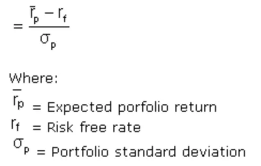
(Kim, 9).

It is as simple as calculating the expected portfolio return and subtracting the risk-free rate (risk-adjusted return) then dividing that quantity by the portfolio standard deviation which represents volatility. In other words it is the ratio of return in excess of the risk-free rate and the volatility of that portfolio. 

The risk-free rate is the rate of return on any investment which has zero risk. In practice the U.S. 3mo. Treasury Bill is typically used as the risk-free rate, at least in the U.S. The current 3mo. T-bill rate as of March 2023 is 4.69% which will be the rate I use in the following calculation of the portfolio with the highest Sharpe Ratio. 



We can see the list of 10 portfolios with the highest Sharpe ratio which are all in a good middle ground between 1 and 2. 

In [36]:
# Assign 3 month Treasury Bill to riskFreeRate
riskFreeRate = 0.0469

# Locate the portfolio which has the highest risk-adjusted return for its volatility
OptimalPortfolio = plot_df.iloc[((plot_df["Return"]-riskFreeRate) / plot_df["Volatility"]).idxmax()]
# iloc, the .idxmax of the list generated from (plot_df["Return"]-riskFreeRate) / plot_df["Volatility"])
SharpePortfolio = pd.DataFrame(OptimalPortfolio)
SharpePortfolio

49828
Return       0.346967
Volatility   0.209483
VOO Weight   0.056494
BND Weight   0.025307
TIP Weight   0.105346
IEFA Weight  0.021555
VUG Weight   0.016867
VTV Weight   0.001250
VOE Weight   0.018521
VOT Weight   0.019911
ANGL Weight  0.127567
IGSB Weight  0.037264
SUB Weight   0.012030
VBK Weight   0.021487
VNQ Weight   0.032892
AAPL Weight  0.079077
UVE Weight   0.119756
AMZN Weight  0.011745
REGN Weight  0.038937
NFLX Weight  0.096841
NEU Weight   0.044817
MNST Weight  0.112336

In [37]:
((plot_df["Return"]-riskFreeRate) / plot_df["Volatility"]).nlargest(n=10)

49828    1.432414
38413    1.431439
32935    1.429965
14347    1.429476
3796     1.414697
43530    1.413699
48213    1.412799
2539     1.409920
4722     1.405161
48971    1.402487
dtype: float64

# Plotting the optimal portfolio on the efficient frontier

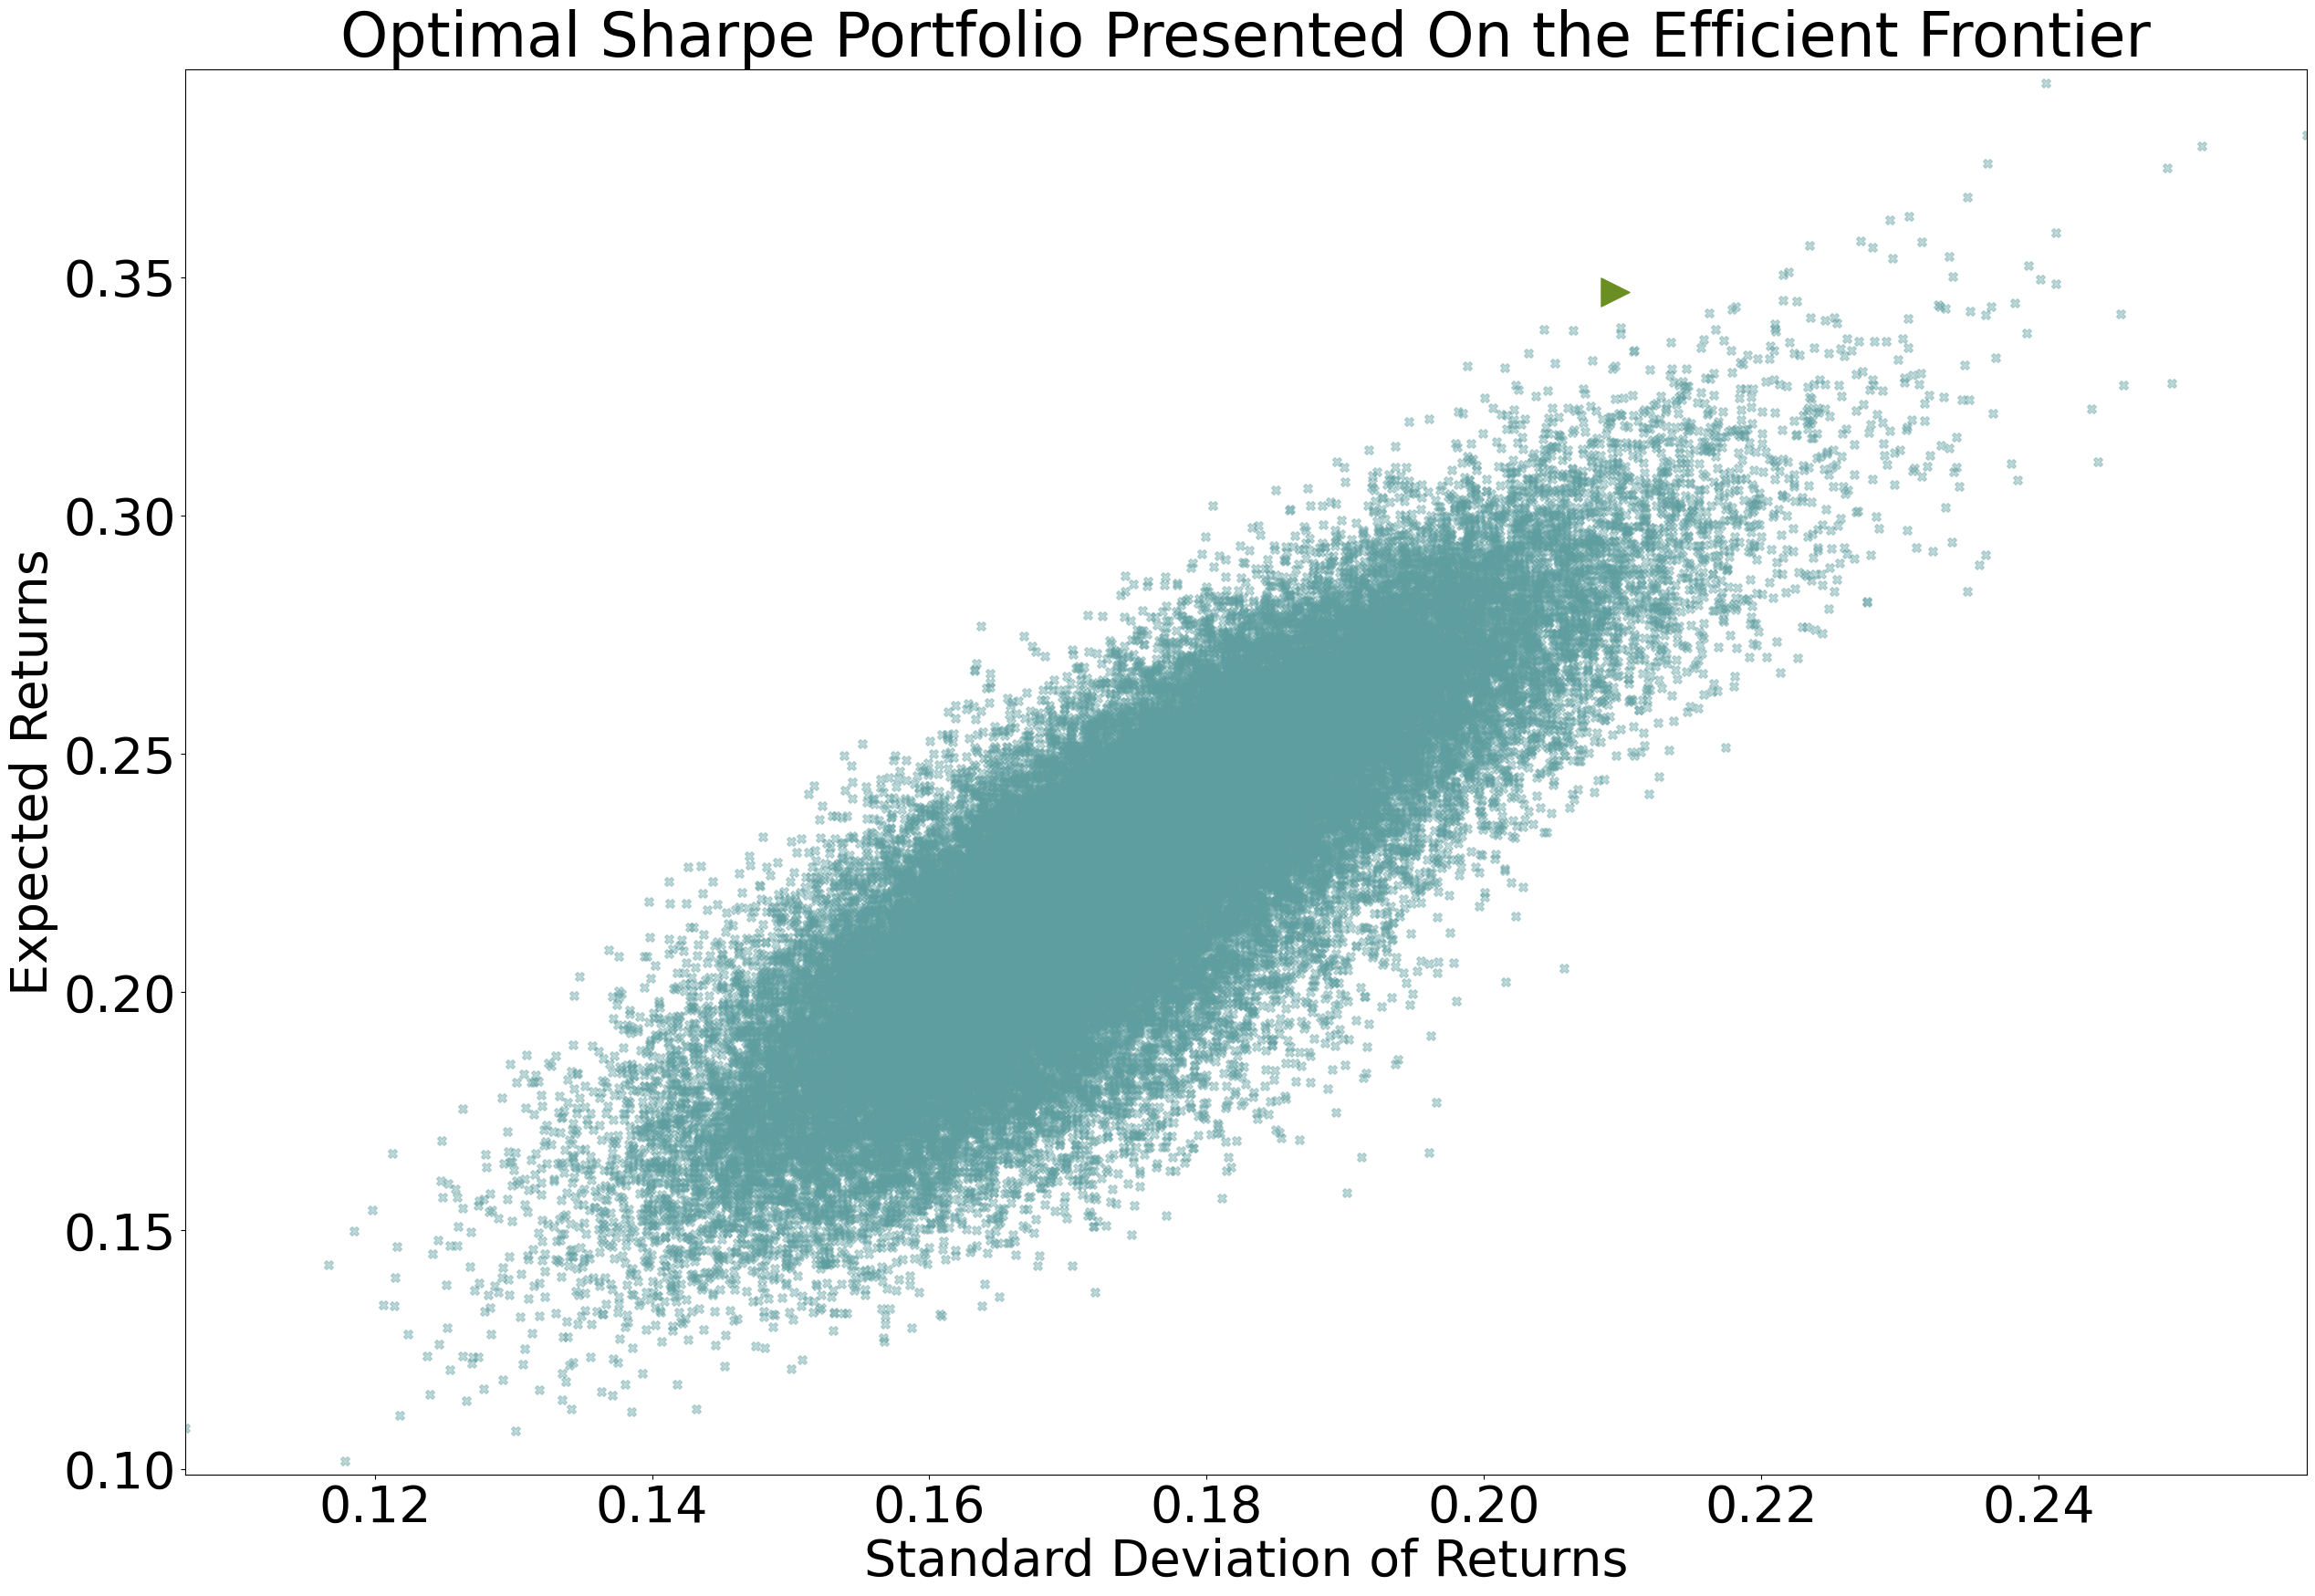

In [46]:
plt.rcParams.update({"font.size":40})
figsize = (30,20)

plt.subplots(figsize=figsize)

plt.scatter(plot_df["Volatility"], plot_df["Return"],marker="X",
           s=50, alpha=0.4,color = 'cadetblue')

# Draw optimal portfolio
plt.scatter(OptimalPortfolio[1],OptimalPortfolio[0],color='olivedrab',marker=">", s=500)

# Labels
plt.title("Optimal Sharpe Portfolio Presented On the Efficient Frontier")
plt.xlabel("Standard Deviation of Returns")
plt.ylabel("Expected Returns");

# Value-at-Risk Based Portfolio Optimization

Constructing a portfolio using risk-adjusted returns is highly concerned with risk-management necessitating the need for sophisticated risk-management techniques. Incurring losses has an outsized effect on the return required to regain that loss. This asymmetry leads us to rely on techniques like value at risk.

Popularized in the 1990s, value at risk, better known as VaR, was developed by J.P. Morgan Chase. It is a probability based measure for potential losses. In more direct terms it is an estimate, in dollars, that can be expected to be exceeded with a given level of probability over a specific time period (Donald 1). So in other words it measures how much of a loss we can expect at a minimum. For example we could expect with 5% certainty that we will lose $19,000 from any given portfolio during a time period. The implications of this is that with a lower degree of certainty we will expect a larger loss, for instance with a 1 percent certainty we would expect a loss of $100,000 for that same aforementioned portfolio. Additionally, comparing two portfolios is only valid if we compare two portfolios over the same time period. Measuring one portfolio's value at risk over a 10-year time horizon is not comparable to measuring another portfolio's, or even the same, value at risk over a 5-year time horizon. Saying that you will incur a $5,000 loss with a 5 percent probability over a month is clearly not equivalent to saying you will incur a $5,000 loss with a 5% probability over a year. 

There are a multitude of ways to measure value at risk. The first thing is to determine the probability you want to calculate, then a time period to measure, and finally how you would like to present the distribution of losses.

# The Analytical or Variance-Covariance Method
This method assumes that portfolio returns are normally distributed. The math we will employ in this model consists of the following: 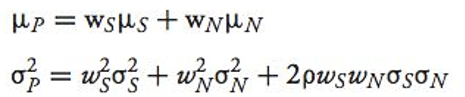
(Donald 1).

mu_subS and mu_subN are the expected returns of two investment assets while sigma_subS and sigma_subN are their respective standard deviations while p is the correlation between the two asset classes. Finally, the expected return and variance of the portfolio are mu_subP and sigma^2_subP where w indicated the percentage allocated to each respective class. This is better understood in the following graphic:
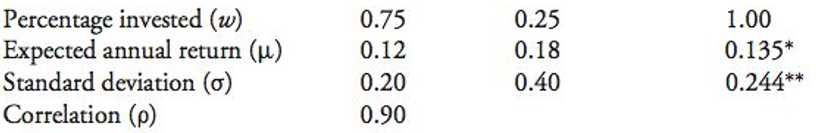
(Donald 1).

# Conditional Value at Risk Method
This method is a logical extension to the traditional value at risk method as it better identifies tail risk and holds onto the property of linearity which allows us to easily integrate it with a portfolio optimization framework (Thomas 10). It a popular method with professional investors and it can be mathetmically expressed as the following:

Graphically:
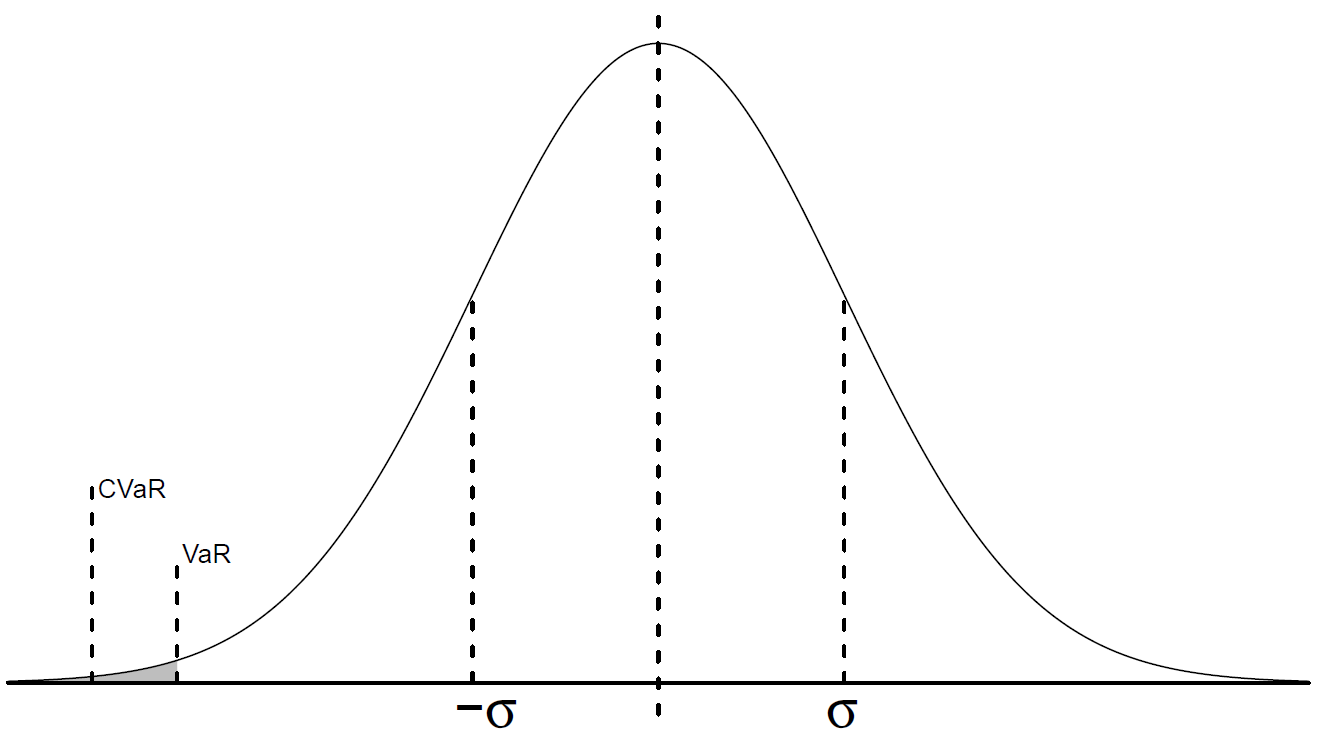
(Thomas 10).

For purposes of portfolio optimization the math employed is as follows: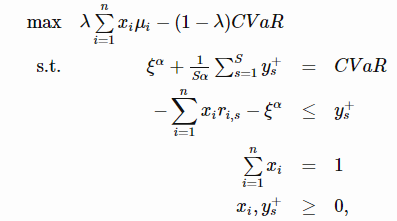
(Thomas 10).

# Limitations
Since value at risk assumed a normal distributions there are issues with that due to the fact that a portfolio's risk cannot exceed the combined risk of the idnividual positions. In certain instances this is volated because it comes possible to reduce risk by dividing a portfolio into two portfolios. This makes no sense and breaks the rule of diversification (Thomas 10).

C:\Users\calvi\AppData\Roaming\Python\Python310\Scripts

https://www.interviewqs.com/blog/value-at-risk

# Dynamic Portfolio Allocation

Research shows that machine learning applications are effective in portfolio allocation--this is better termed dynamic portfolio allocation. 

# Importance
	This computational model is important because from a philosophical perspective, having quantitative methods for investment portfolio construction purposes enables humans, as highly irrational and unpredictable as we are, to make better decisions. Having quantitative methods for producing robust investment portfolios can help investors achieve their goals in a more disciplined and rational way. The extensibility of programming can enable investors to limitlessly fine-tune the data and methods used to construct their portfolios leading to a more efficient capital market less hindered by the frailty of the human condition. I.e. emotionality, sleep requirements, and lack of multi-tasking capabilities. 
    
	It is clear from the emergence of so-called ‘robo-advisors’ that computational models like this are not fruitless works and that many individual investors stand to benefit from rationally constructed investment portfolios which could take into account any number of variables, constraints, factors—whatever you would like to call them—things like the investor’s time-horizon, their risk-tolerance, desire for return, liquidity requirements, etc. There really is no serious limit to how complex the program could become. For instance, imagine a world where when you use your phone to pay for something using ‘tap to pay’ that money is coming straight out of an individual brokerage account and was transacted for in real-time. Stop and consider the implications for the overall capitalization and liquidity of the capital markets. Markets would be more liquid and pricing would, presumably, be more efficient, in part, due to the volume of money searching for more efficient means of generating a return. As we know, return follows value. 
    
	On another front, stop and consider the United States’ specific issues with rates of investment in the population. A significant proportion of our workforce live paycheck to paycheck and have little, if any, savings—let alone investment. With more robust and useful quantitative models we could provide the government tools to force capital market participation that is not quite so inefficient or make it so easy for those individuals to participate that they do so. Imagine that your phone itself was your bank and brokerage account itself. The possibilities are endless with programs, tools, and models which are well designed.  

# Limitations
    Deterministic computational programs like this uses en masse could create a situation where everyone defaults to methods like this and thereby create a negative feedback loop within the financial markets thereby exacerbating volatility. This would be especially true for dynamic and real-time portfolio construction programs where decisions are made nearly instantaneously. If one program quit investing in one firm and decided to focus on another asset class, sector, or firm and another program picked up on the shift resulting in that decision or even the shift in the program itself, it could result in a cascading meltdown through the financial markets at large. Although there are restriction which exist that are capable of preventing such meltdowns. Those are restrictions such as the market being open for a set period of time for five days a week and a circuit breaker which shuts down trading in the event of extreme booms or busts. 
    
    On top of these issues, we know that the capital asset pricing models have significant empirical limitations which is why there are improvements upon it like modern portfolio theory and work done by Fama and French. All reductive models tend to have significant empirical limitations and their validity has often been invalidated in practical applications (Fama 3). However, we know that some of the top firms utilize significant levels of computational modelling in order to obtain their returns, thus leading one to conclude that this field of research can be fruitful.
    
    
    
# Improvement Possibilities
    Further regulations could enhance the stability of the financial system like limitations on the scale of automatic trades requiring human intervention. Perhaps the models could talk to one another too and come to a consensus like we see in the decentralized finance realm of distributed ledger technologies. 
    
    Additionally, there is work being done in quantum finance and machine learning which accomodate for some of the shortcomings of this type of program and the limitations of Modern Portfolio theory which do not accurately represent reality. Wu (5) and other found that 3.2% to 5.2% returns were possible using machine learning which was an improvement over equal-weighted allocations. Not only that, but they also found that machine learning benefited from periods of higher volatility which would help in especially uncertain market environment. This outcome was also consistent with work done by Ivanyuk (6) in which their dynamic model outperformed standard modern portfolio theory in terms of efficiency. In another paper by Lim and colleagues (7) they found that a prediction model outperformed a non-predictive model by between 27 and 94%--an astounding increase in performance. 

    
    
    In conclusion, future work into machine learning, or better termed dynamic portfolio rebalancing, and factors which could lead to increased financial stability would be extremely beneficial to this field of research.
